Starting data preprocessing...
Data preprocessing finished. Training samples: 47780, Test samples: 11946

Training base CNN-RNN...
Epoch 1/70
1494/1494 - 35s - 24ms/step - loss: 0.0172 - mae: 0.1042 - mse: 0.0364 - val_loss: 0.5804 - val_mae: 0.6043 - val_mse: 1.9617
Epoch 2/70
1494/1494 - 28s - 19ms/step - loss: 0.0049 - mae: 0.0660 - mse: 0.0099 - val_loss: 0.5453 - val_mae: 0.5734 - val_mse: 1.7967
Epoch 3/70
1494/1494 - 31s - 20ms/step - loss: 0.0035 - mae: 0.0570 - mse: 0.0071 - val_loss: 0.5368 - val_mae: 0.5640 - val_mse: 1.7466
Epoch 4/70
1494/1494 - 31s - 21ms/step - loss: 0.0028 - mae: 0.0511 - mse: 0.0056 - val_loss: 0.5359 - val_mae: 0.5614 - val_mse: 1.7351
Epoch 5/70
1494/1494 - 30s - 20ms/step - loss: 0.0024 - mae: 0.0467 - mse: 0.0047 - val_loss: 0.5363 - val_mae: 0.5629 - val_mse: 1.7332
Epoch 6/70
1494/1494 - 31s - 21ms/step - loss: 0.0020 - mae: 0.0433 - mse: 0.0041 - val_loss: 0.5429 - val_mae: 0.5701 - val_mse: 1.7634
Epoch 7/70
1494/1494 - 31s - 21ms/step - loss: 

c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
  current = self.get_monitor_value(logs)


934/934 - 8s - 8ms/step - loss: 0.0028 - mae: 0.0285 - mse: 0.0057
Epoch 3/60
934/934 - 8s - 8ms/step - loss: 0.0014 - mae: 0.0224 - mse: 0.0029
Epoch 4/60
934/934 - 8s - 9ms/step - loss: 0.0011 - mae: 0.0202 - mse: 0.0022
Epoch 5/60
934/934 - 8s - 8ms/step - loss: 8.9909e-04 - mae: 0.0184 - mse: 0.0018
Epoch 6/60
934/934 - 8s - 8ms/step - loss: 8.1248e-04 - mae: 0.0175 - mse: 0.0016
Epoch 7/60
934/934 - 8s - 8ms/step - loss: 7.8742e-04 - mae: 0.0170 - mse: 0.0016
Epoch 8/60
934/934 - 8s - 9ms/step - loss: 6.7287e-04 - mae: 0.0159 - mse: 0.0013
Epoch 9/60
934/934 - 8s - 8ms/step - loss: 5.9543e-04 - mae: 0.0150 - mse: 0.0012
Epoch 10/60
934/934 - 8s - 8ms/step - loss: 5.6120e-04 - mae: 0.0147 - mse: 0.0011
Epoch 11/60
934/934 - 8s - 8ms/step - loss: 5.3395e-04 - mae: 0.0143 - mse: 0.0011
Epoch 12/60
934/934 - 8s - 8ms/step - loss: 5.1515e-04 - mae: 0.0141 - mse: 0.0010
Epoch 13/60
934/934 - 8s - 8ms/step - loss: 5.0453e-04 - mae: 0.0139 - mse: 0.0010
Epoch 14/60
934/934 - 8s - 8ms/step

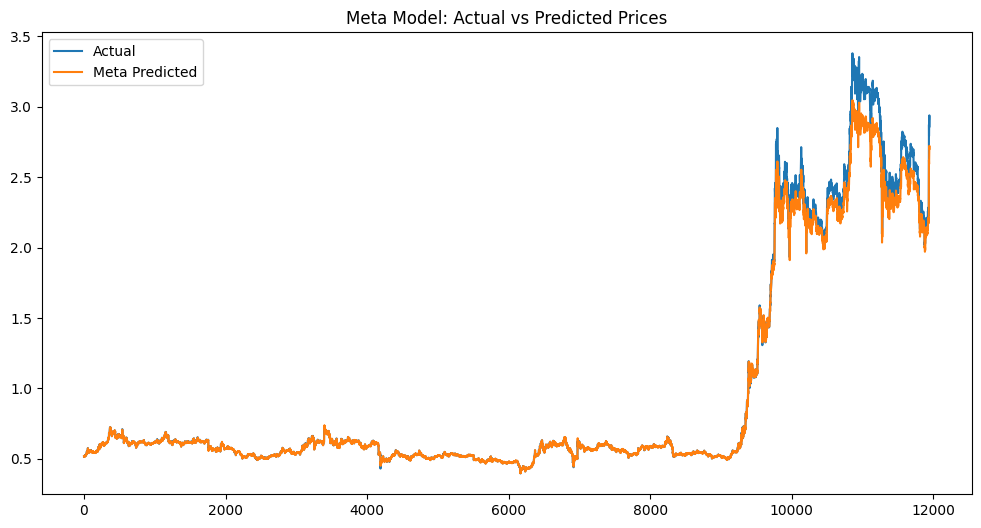

374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Base Model Performance Metrics:
CNN_RNN - MAE: 0.1756, RMSE: 0.4125, MAPE: 7.88%
CNN_RNN_All_Data - MAE: 0.0168, RMSE: 0.0371, MAPE: 1.19%
XGB - MAE: 0.0526, RMSE: 0.1088, MAPE: 2.87%
Naive_Forecast - MAE: 0.0068, RMSE: 0.0164, MAPE: 0.57%
DeepNN - MAE: 0.0075, RMSE: 0.0171, MAPE: 0.64%
DeepNN_All_Data - MAE: 0.0067, RMSE: 0.0152, MAPE: 0.58%
Hybrid_CNN_RNN_Vanille - MAE: 0.1063, RMSE: 0.2611, MAPE: 4.68%
Hybrid_CNN_RNN_Vanille_All_Data - MAE: 0.0380, RMSE: 0.0784, MAPE: 2.37%


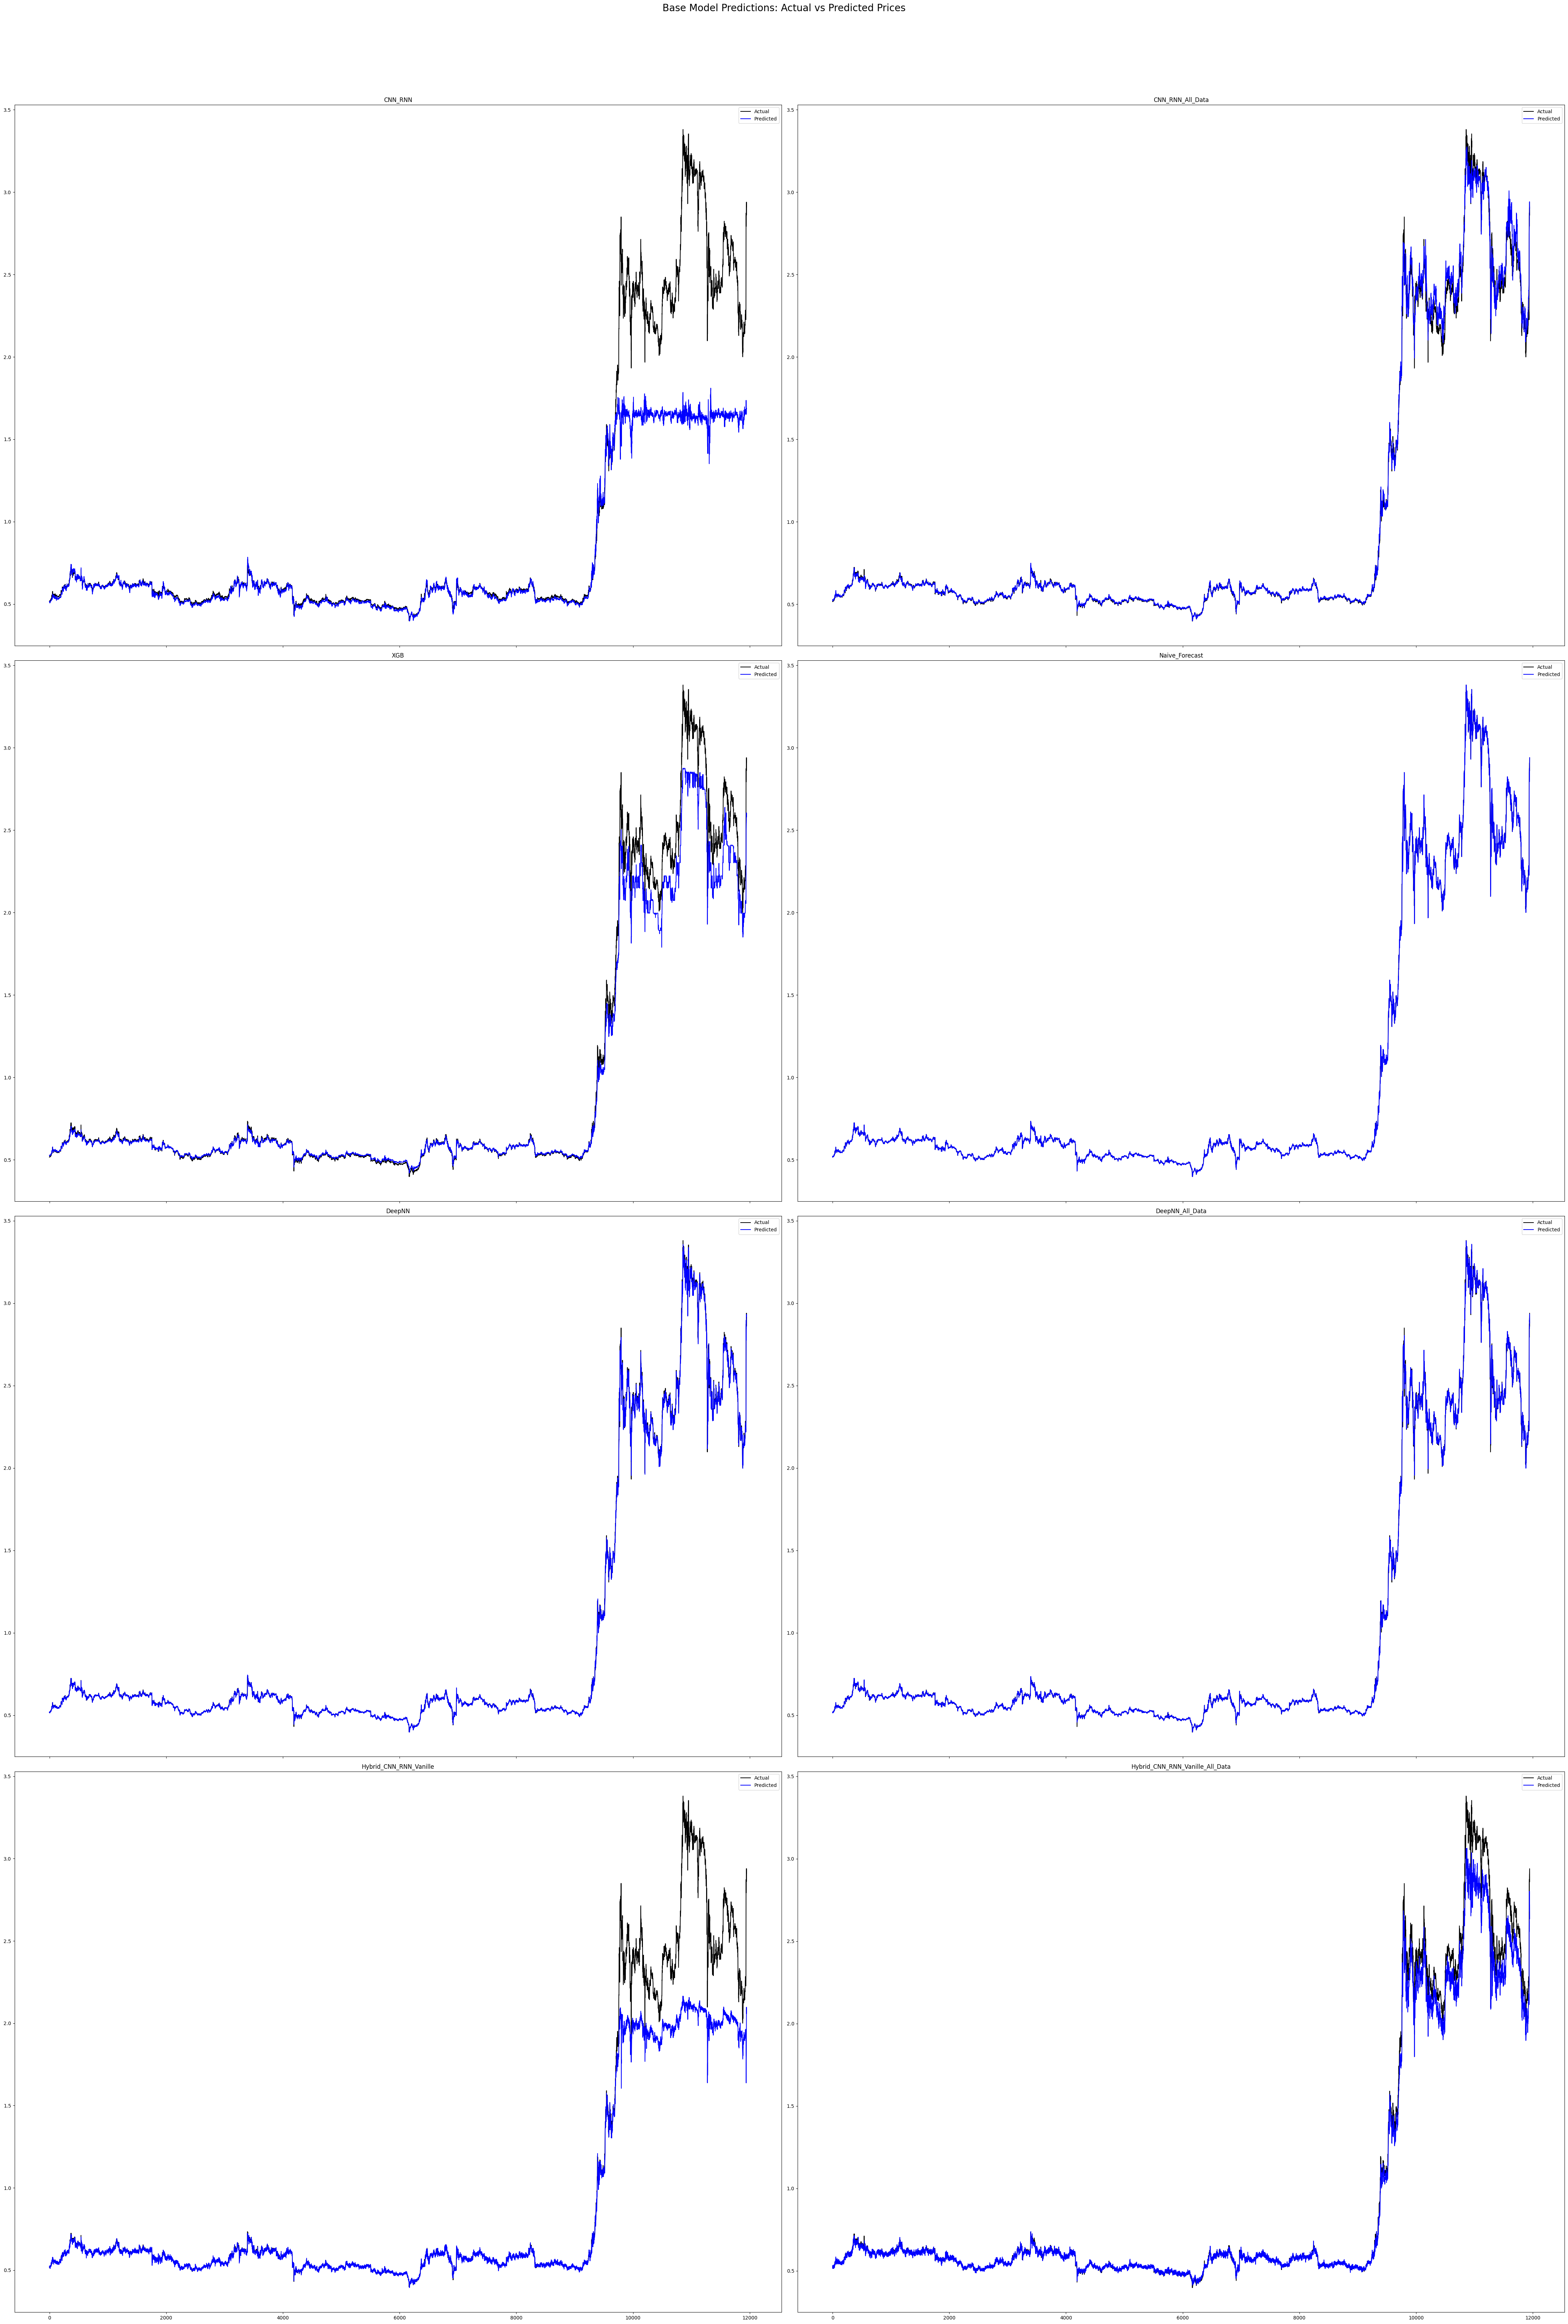

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)


# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                           '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']

    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df
    
    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                  self.price_cols,
                                                  self.volatility_cols,
                                                  self.momentum_cols,
                                                  self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")
    
    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== New Deep Neural Network Model ======================
class DeepNN:
    """
    A very deep neural network that treats the input as flattened (non-time series) data.
    """
    def __init__(self, input_shape):
        self.input_dim = input_shape[0] * input_shape[1]
        self.model = self._build_model(self.input_dim)

    def _build_model(self, input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        x = Dense(512, activation='relu')(inputs)
        x = Dense(512, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=100):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                           epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=60, batch_size=64,
                           callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)

    def _build_model(self, input_shape):
        # Model uses a fixed batch shape for stateful RNN (e.g., (32, 30, 23))
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                       validation_data=validation_data,
                       epochs=epochs,
                       callbacks=[EarlyStopping(patience=10)],
                       batch_size=32,
                       verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()

    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                   padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)
    
        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                   padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                              recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()

    def _build_model(self):
        # This model is identical to HybridCNNRNN_vanille, but used for training on all data.
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                   padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)
    
        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                   padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                              recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)

    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)

    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(128, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=64,
                       validation_data=validation_data,
                       callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                       verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")

# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)

    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds
        ]
        return np.column_stack(base_preds)
    
    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        # Split updated data into train (80%) and validation (20%)
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32):
        """
        Fine tune all models on the daily dataset.
        Before fine-tuning, freeze the first 80% of layers in each model.
        Daily data is split in 80:20 train:validation format.
        """
        print("\nStarting fine-tuning on daily dataset...")
        # Split daily dataset (80:20)
        X_daily_train, X_daily_val, y_daily_train, y_daily_val = train_test_split(
            X_daily, y_daily, test_size=0.2, random_state=42
        )
        # Freeze layers for all models (except XGBoost)
        print("Freezing layers for HybridCNNRNN model...")
        freeze_model_layers(self.models['cnn_rnn'].model, freeze_ratio=0.8)
        print("Freezing layers for full-data HybridCNNRNN model...")
        freeze_model_layers(self.models['cnn_rnn_all_data'].model, freeze_ratio=0.8)
        print("Freezing layers for DeepNN model...")
        freeze_model_layers(self.models['deep_nn'].model, freeze_ratio=0.8)
        print("Freezing layers for DeepNN (all data) model...")
        freeze_model_layers(self.models['deep_nn_all_data'].model, freeze_ratio=0.8)
        print("Freezing layers for Meta model...")
        freeze_model_layers(self.models['meta'].model, freeze_ratio=0.8)
        print("Freezing layers for HybridCNNRNN_vanille model...")
        freeze_model_layers(self.models['hybrid_cnn_rnn_vanille'].model, freeze_ratio=0.8)
        print("Freezing layers for HybridCNNRNN_vanille_all_data model...")
        freeze_model_layers(self.models['hybrid_cnn_rnn_vanille_all_data'].model, freeze_ratio=0.8)

        # Fine tune base models with daily train:validation split
        print("Fine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,  # fixed batch size for vanille model
            verbose=2
        )
        print("Fine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            verbose=2
        )
        # Prepare meta-model inputs from daily training data
        print("Preparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        print("Fine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily, y_daily_train,
            validation_data=(self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val), y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2,
            callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)]
        )
        print("Fine-tuning completed.")

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        # Split updated data into 80:20 train:validation
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32):
        print("\nStarting fine-tuning on daily dataset...")
        # Split daily data into 80:20 train:validation
        X_daily_train, X_daily_val, y_daily_train, y_daily_val = train_test_split(
            X_daily, y_daily, test_size=0.2, random_state=42
        )
        # Freeze layers for all models (except XGBoost)
        print("Freezing layers for HybridCNNRNN model...")
        freeze_model_layers(self.models['cnn_rnn'].model, freeze_ratio=0.8)
        print("Freezing layers for full-data HybridCNNRNN model...")
        freeze_model_layers(self.models['cnn_rnn_all_data'].model, freeze_ratio=0.8)
        print("Freezing layers for DeepNN model...")
        freeze_model_layers(self.models['deep_nn'].model, freeze_ratio=0.8)
        print("Freezing layers for DeepNN (all data) model...")
        freeze_model_layers(self.models['deep_nn_all_data'].model, freeze_ratio=0.8)
        print("Freezing layers for Meta model...")
        freeze_model_layers(self.models['meta'].model, freeze_ratio=0.8)
        print("Freezing layers for HybridCNNRNN_vanille model...")
        freeze_model_layers(self.models['hybrid_cnn_rnn_vanille'].model, freeze_ratio=0.8)
        print("Freezing layers for HybridCNNRNN_vanille_all_data model...")
        freeze_model_layers(self.models['hybrid_cnn_rnn_vanille_all_data'].model, freeze_ratio=0.8)

        # Fine tune base models using daily train:validation split
        print("Fine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("Fine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,  # Fixed for vanille model
            verbose=2
        )
        print("Fine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            verbose=2
        )
        # Prepare meta-model inputs from daily training data
        print("Preparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("Fine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2,
            callbacks=[ReduceLROnPlateau(factor=0.5, patience=3)]
        )
        print("Fine-tuning completed.")

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]  # Expected to be (30, num_features)
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])
    
    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((8,)),  # Meta-model expects 8 inputs (from 8 base predictions)
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape),
        'deep_nn_all_data': DeepNN(input_shape)
    }
    
    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()
    
    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()
    
    # Fine-tuning example (uncomment if daily data is available)
    # daily_df = pd.read_csv(r"daily_dataset_with_features.csv")
    # X_daily, y_daily, _, _, _, _, _, _ = pipeline.preprocess_data(daily_df, fit_scalers=False)
    # ensemble.fine_tune(X_daily, y_daily, fine_tune_epochs=50, batch_size=32)
    
    # Evaluate meta-model performance
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }
    
    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()
    
    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()
    
    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')
    
    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN': deep_nn_preds,
        'DeepNN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds
    }
    
    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds)/y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")
    
    fig, axs = plt.subplots(4, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}")
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                           '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']

    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df
    
    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                  self.price_cols,
                                                  self.volatility_cols,
                                                  self.momentum_cols,
                                                  self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")
    
    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== New Deep Neural Network Model ======================
class DeepNN:
    """
    A very deep neural network that treats the input as flattened (non-time series) data.
    """
    def __init__(self, input_shape):
        self.input_dim = input_shape[0] * input_shape[1]
        self.model = self._build_model(self.input_dim)

    def _build_model(self, input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        x = Dense(512, activation='relu')(inputs)
        x = Dense(512, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        Dropout(0.2)(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=100):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                           epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=epochs, batch_size=64,
                           callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)

    def _build_model(self, input_shape):
        # Model uses a fixed batch shape for stateful GRU (e.g., (32, 30, 23))
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                       validation_data=validation_data,
                       epochs=epochs,
                       callbacks=[EarlyStopping(patience=10)],
                       batch_size=32,
                       verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()

    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                   padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)
    
        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                   padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                              recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()

    def _build_model(self):
        # Identical to HybridCNNRNN_vanille, used for training on all data.
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                   padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)
    
        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                   padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                              recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)

    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)

    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(64, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=32,
                       validation_data=validation_data,
                       callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                       verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")

def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    """
    Adjust the model for fine tuning:
    - Set the optimizer learning rate to new_lr.
    - Adjust Dropout layers to new_dropout_rate.
    """
    if hasattr(model.optimizer, 'learning_rate'):
        tf.keras.backend.set_value(model.optimizer.learning_rate, new_lr)
        print(f"Set new learning rate: {new_lr}")
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            old_rate = layer.rate
            layer.rate = new_dropout_rate
            print(f"Updated dropout rate in {layer.name}: {old_rate} -> {new_dropout_rate}")
    return model

# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)

    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds
        ]
        return np.column_stack(base_preds)
    
    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled
    
    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")


    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        # Split updated data into 80:20 train:validation
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32, freeze_ratio=0.6):
        """
        Fine tune all models on the daily dataset.
        Daily data is split 80:20 (train:validation) internally.
        Before fine tuning, freeze the first freeze_ratio of layers in each model,
        reset RNN states (if applicable), lower the learning rate, and reduce dropout.
        """
        print("\nStarting fine-tuning on daily dataset...")
        X_daily_train, X_daily_val, y_daily_train, y_daily_val = train_test_split(
            X_daily, y_daily, test_size=0.2, random_state=42
        )
        # For each NN model, adjust before fine tuning
        for key in self.models:
            if key != 'xgb':  # Skip XGBoost
                print(f"\nAdjusting model {key} for fine tuning:")
                freeze_model_layers(self.models[key].model, freeze_ratio=freeze_ratio)
                # Reset states if available
                if hasattr(self.models[key].model, 'reset_states'):
                    self.models[key].model.reset_states()
                adjust_model_for_finetuning(self.models[key].model, new_lr=1e-5, new_dropout_rate=0.1)

        # Fine tune each base model with daily train:validation splits.
        print("\nFine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("\nFine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("\nFine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("\nFine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,  # fixed batch size for vanille model
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            verbose=2
        )
        print("\nPreparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily_train = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("\nFine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily_train, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            verbose=2,
            callbacks=[ReduceLROnPlateau(factor=0.5, patience=5)]
        )
        print("Fine-tuning completed.")

    def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
        """
        Adjust the model for fine tuning:
        - Lower the optimizer learning rate.
        - Adjust Dropout layers to new_dropout_rate.
        """
        if hasattr(model.optimizer, 'learning_rate'):
            tf.keras.backend.set_value(model.optimizer.learning_rate, new_lr)
            print(f"Set new learning rate: {new_lr}")
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Dropout):
                old_rate = layer.rate
                layer.rate = new_dropout_rate
                print(f"Updated dropout rate in {layer.name}: {old_rate} -> {new_dropout_rate}")
        return model



# ====================== Ensemble System End ======================

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]  # Expected to be (30, num_features)
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])
    
    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((8,)),  # Meta-model expects 8 inputs (from 8 base predictions)
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape),
        'deep_nn_all_data': DeepNN(input_shape)
    }
    
    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()
    
    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()
    
    # Fine-tuning example: 
    # daily_df = pd.read_csv(r"daily_dataset_with_features.csv")
    # X_daily, y_daily, _, _, _, _, _, _ = pipeline.preprocess_data(daily_df, fit_scalers=False)
    # For consistency, ensure X_daily and y_daily have the same number of samples.
    # ensemble.fine_tune(X_daily, y_daily, fine_tune_epochs=10, batch_size=16)
    
    # Evaluate meta-model performance on the test set
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }
    
    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()
    
    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()
    
    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')
    
    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN': deep_nn_preds,
        'DeepNN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds
    }
    
    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds) / y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")
    
    fig, axs = plt.subplots(4, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}", fontsize=16)
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()


Starting data preprocessing...
Data preprocessing finished. Training samples: 47780, Test samples: 11946

Training base CNN-RNN...
Epoch 1/70
1494/1494 - 43s - 29ms/step - loss: 0.0347 - mae: 0.1657 - mse: 0.0716 - val_loss: 0.5723 - val_mae: 0.5963 - val_mse: 1.9170
Epoch 2/70
1494/1494 - 34s - 23ms/step - loss: 0.0168 - mae: 0.1201 - mse: 0.0337 - val_loss: 0.5633 - val_mae: 0.5874 - val_mse: 1.8882
Epoch 3/70
1494/1494 - 34s - 22ms/step - loss: 0.0138 - mae: 0.1083 - mse: 0.0276 - val_loss: 0.5992 - val_mae: 0.6139 - val_mse: 2.1177
Epoch 4/70
1494/1494 - 36s - 24ms/step - loss: 0.0122 - mae: 0.1019 - mse: 0.0245 - val_loss: 0.6322 - val_mae: 0.6500 - val_mse: 2.2416
Epoch 5/70
1494/1494 - 37s - 25ms/step - loss: 0.0116 - mae: 0.0988 - mse: 0.0233 - val_loss: 0.5470 - val_mae: 0.5701 - val_mse: 1.8554
Epoch 6/70
1494/1494 - 36s - 24ms/step - loss: 0.0111 - mae: 0.0963 - mse: 0.0221 - val_loss: 0.5473 - val_mae: 0.5712 - val_mse: 1.8541
Epoch 7/70
1494/1494 - 36s - 24ms/step - loss: 

c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
  current = self.get_monitor_value(logs)


934/934 - 9s - 9ms/step - loss: 0.0028 - mae: 0.0287 - mse: 0.0056
Epoch 3/100
934/934 - 9s - 10ms/step - loss: 0.0015 - mae: 0.0225 - mse: 0.0029
Epoch 4/100
934/934 - 9s - 10ms/step - loss: 0.0011 - mae: 0.0200 - mse: 0.0022
Epoch 5/100
934/934 - 9s - 9ms/step - loss: 8.9100e-04 - mae: 0.0184 - mse: 0.0018
Epoch 6/100
934/934 - 9s - 10ms/step - loss: 7.9036e-04 - mae: 0.0174 - mse: 0.0016
Epoch 7/100
934/934 - 9s - 9ms/step - loss: 7.8817e-04 - mae: 0.0171 - mse: 0.0016
Epoch 8/100
934/934 - 9s - 9ms/step - loss: 6.7790e-04 - mae: 0.0160 - mse: 0.0014
Epoch 9/100
934/934 - 9s - 9ms/step - loss: 6.0126e-04 - mae: 0.0151 - mse: 0.0012
Epoch 10/100
934/934 - 9s - 10ms/step - loss: 5.6719e-04 - mae: 0.0147 - mse: 0.0011
Epoch 11/100
934/934 - 9s - 10ms/step - loss: 5.4115e-04 - mae: 0.0144 - mse: 0.0011
Epoch 12/100
934/934 - 9s - 10ms/step - loss: 5.2198e-04 - mae: 0.0142 - mse: 0.0010
Epoch 13/100
934/934 - 9s - 10ms/step - loss: 5.1106e-04 - mae: 0.0140 - mse: 0.0010
Epoch 14/100
934/

AttributeError: 'TemporalEnsemble' object has no attribute 'save_models'

Starting data preprocessing...
Data preprocessing finished. Training samples: 47780, Test samples: 11946

Training base CNN-RNN...
Epoch 1/70
1494/1494 - 69s - 46ms/step - loss: 0.0347 - mae: 0.1657 - mse: 0.0716 - val_loss: 0.5723 - val_mae: 0.5963 - val_mse: 1.9170
Epoch 2/70
1494/1494 - 64s - 43ms/step - loss: 0.0168 - mae: 0.1201 - mse: 0.0337 - val_loss: 0.5633 - val_mae: 0.5874 - val_mse: 1.8882
Epoch 3/70
1494/1494 - 82s - 55ms/step - loss: 0.0138 - mae: 0.1083 - mse: 0.0276 - val_loss: 0.5992 - val_mae: 0.6139 - val_mse: 2.1177
Epoch 4/70
1494/1494 - 83s - 56ms/step - loss: 0.0122 - mae: 0.1019 - mse: 0.0245 - val_loss: 0.6322 - val_mae: 0.6500 - val_mse: 2.2416
Epoch 5/70
1494/1494 - 82s - 55ms/step - loss: 0.0116 - mae: 0.0988 - mse: 0.0233 - val_loss: 0.5470 - val_mae: 0.5701 - val_mse: 1.8554
Epoch 6/70
1494/1494 - 101s - 68ms/step - loss: 0.0111 - mae: 0.0963 - mse: 0.0221 - val_loss: 0.5473 - val_mae: 0.5712 - val_mse: 1.8541
Epoch 7/70
1494/1494 - 103s - 69ms/step - loss

c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
  current = self.get_monitor_value(logs)


934/934 - 11s - 11ms/step - loss: 0.0028 - mae: 0.0287 - mse: 0.0056
Epoch 3/35
934/934 - 11s - 11ms/step - loss: 0.0015 - mae: 0.0225 - mse: 0.0029
Epoch 4/35
934/934 - 11s - 11ms/step - loss: 0.0011 - mae: 0.0200 - mse: 0.0022
Epoch 5/35
934/934 - 11s - 11ms/step - loss: 8.9100e-04 - mae: 0.0184 - mse: 0.0018
Epoch 6/35
934/934 - 10s - 11ms/step - loss: 7.9036e-04 - mae: 0.0174 - mse: 0.0016
Epoch 7/35
934/934 - 11s - 11ms/step - loss: 7.8817e-04 - mae: 0.0171 - mse: 0.0016
Epoch 8/35
934/934 - 10s - 11ms/step - loss: 6.7790e-04 - mae: 0.0160 - mse: 0.0014
Epoch 9/35
934/934 - 11s - 11ms/step - loss: 6.0126e-04 - mae: 0.0151 - mse: 0.0012
Epoch 10/35
934/934 - 11s - 11ms/step - loss: 5.6719e-04 - mae: 0.0147 - mse: 0.0011
Epoch 11/35
934/934 - 10s - 11ms/step - loss: 5.4115e-04 - mae: 0.0144 - mse: 0.0011
Epoch 12/35
934/934 - 10s - 11ms/step - loss: 5.2198e-04 - mae: 0.0142 - mse: 0.0010
Epoch 13/35
934/934 - 10s - 11ms/step - loss: 5.1106e-04 - mae: 0.0140 - mse: 0.0010
Epoch 14/35

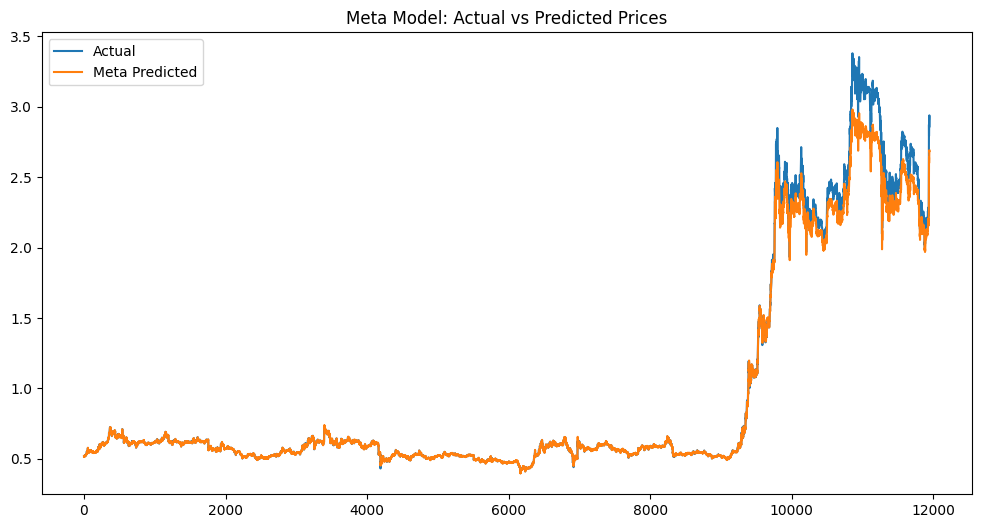

374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step

Base Model Performance Metrics:
CNN_RNN - MAE: 0.1804, RMSE: 0.4247, MAPE: 7.91%
CNN_RNN_All_Data - MAE: 0.0328, RMSE: 0.0753, MAPE: 1.89%
XGB - MAE: 0.0526, RMSE: 0.1088, MAPE: 2.87%
Naive_Forecast - MAE: 0.0068, RMSE: 0.0164, MAPE: 0.57%
DeepNN - MAE: 0.0072, RMSE: 0.0168, MAPE: 0.62%
DeepNN_All_Data - MAE: 0.0067, RMSE: 0.0153, MAPE: 0.58%
Hybrid_CNN_RNN_Vanille - MAE: 0.1607, RMSE: 0.3568, MAPE: 7.76%
Hybrid_CNN_RNN_Vanille_All_Data - MAE: 0.1087, RMSE: 0.2280, MAPE: 5.53%


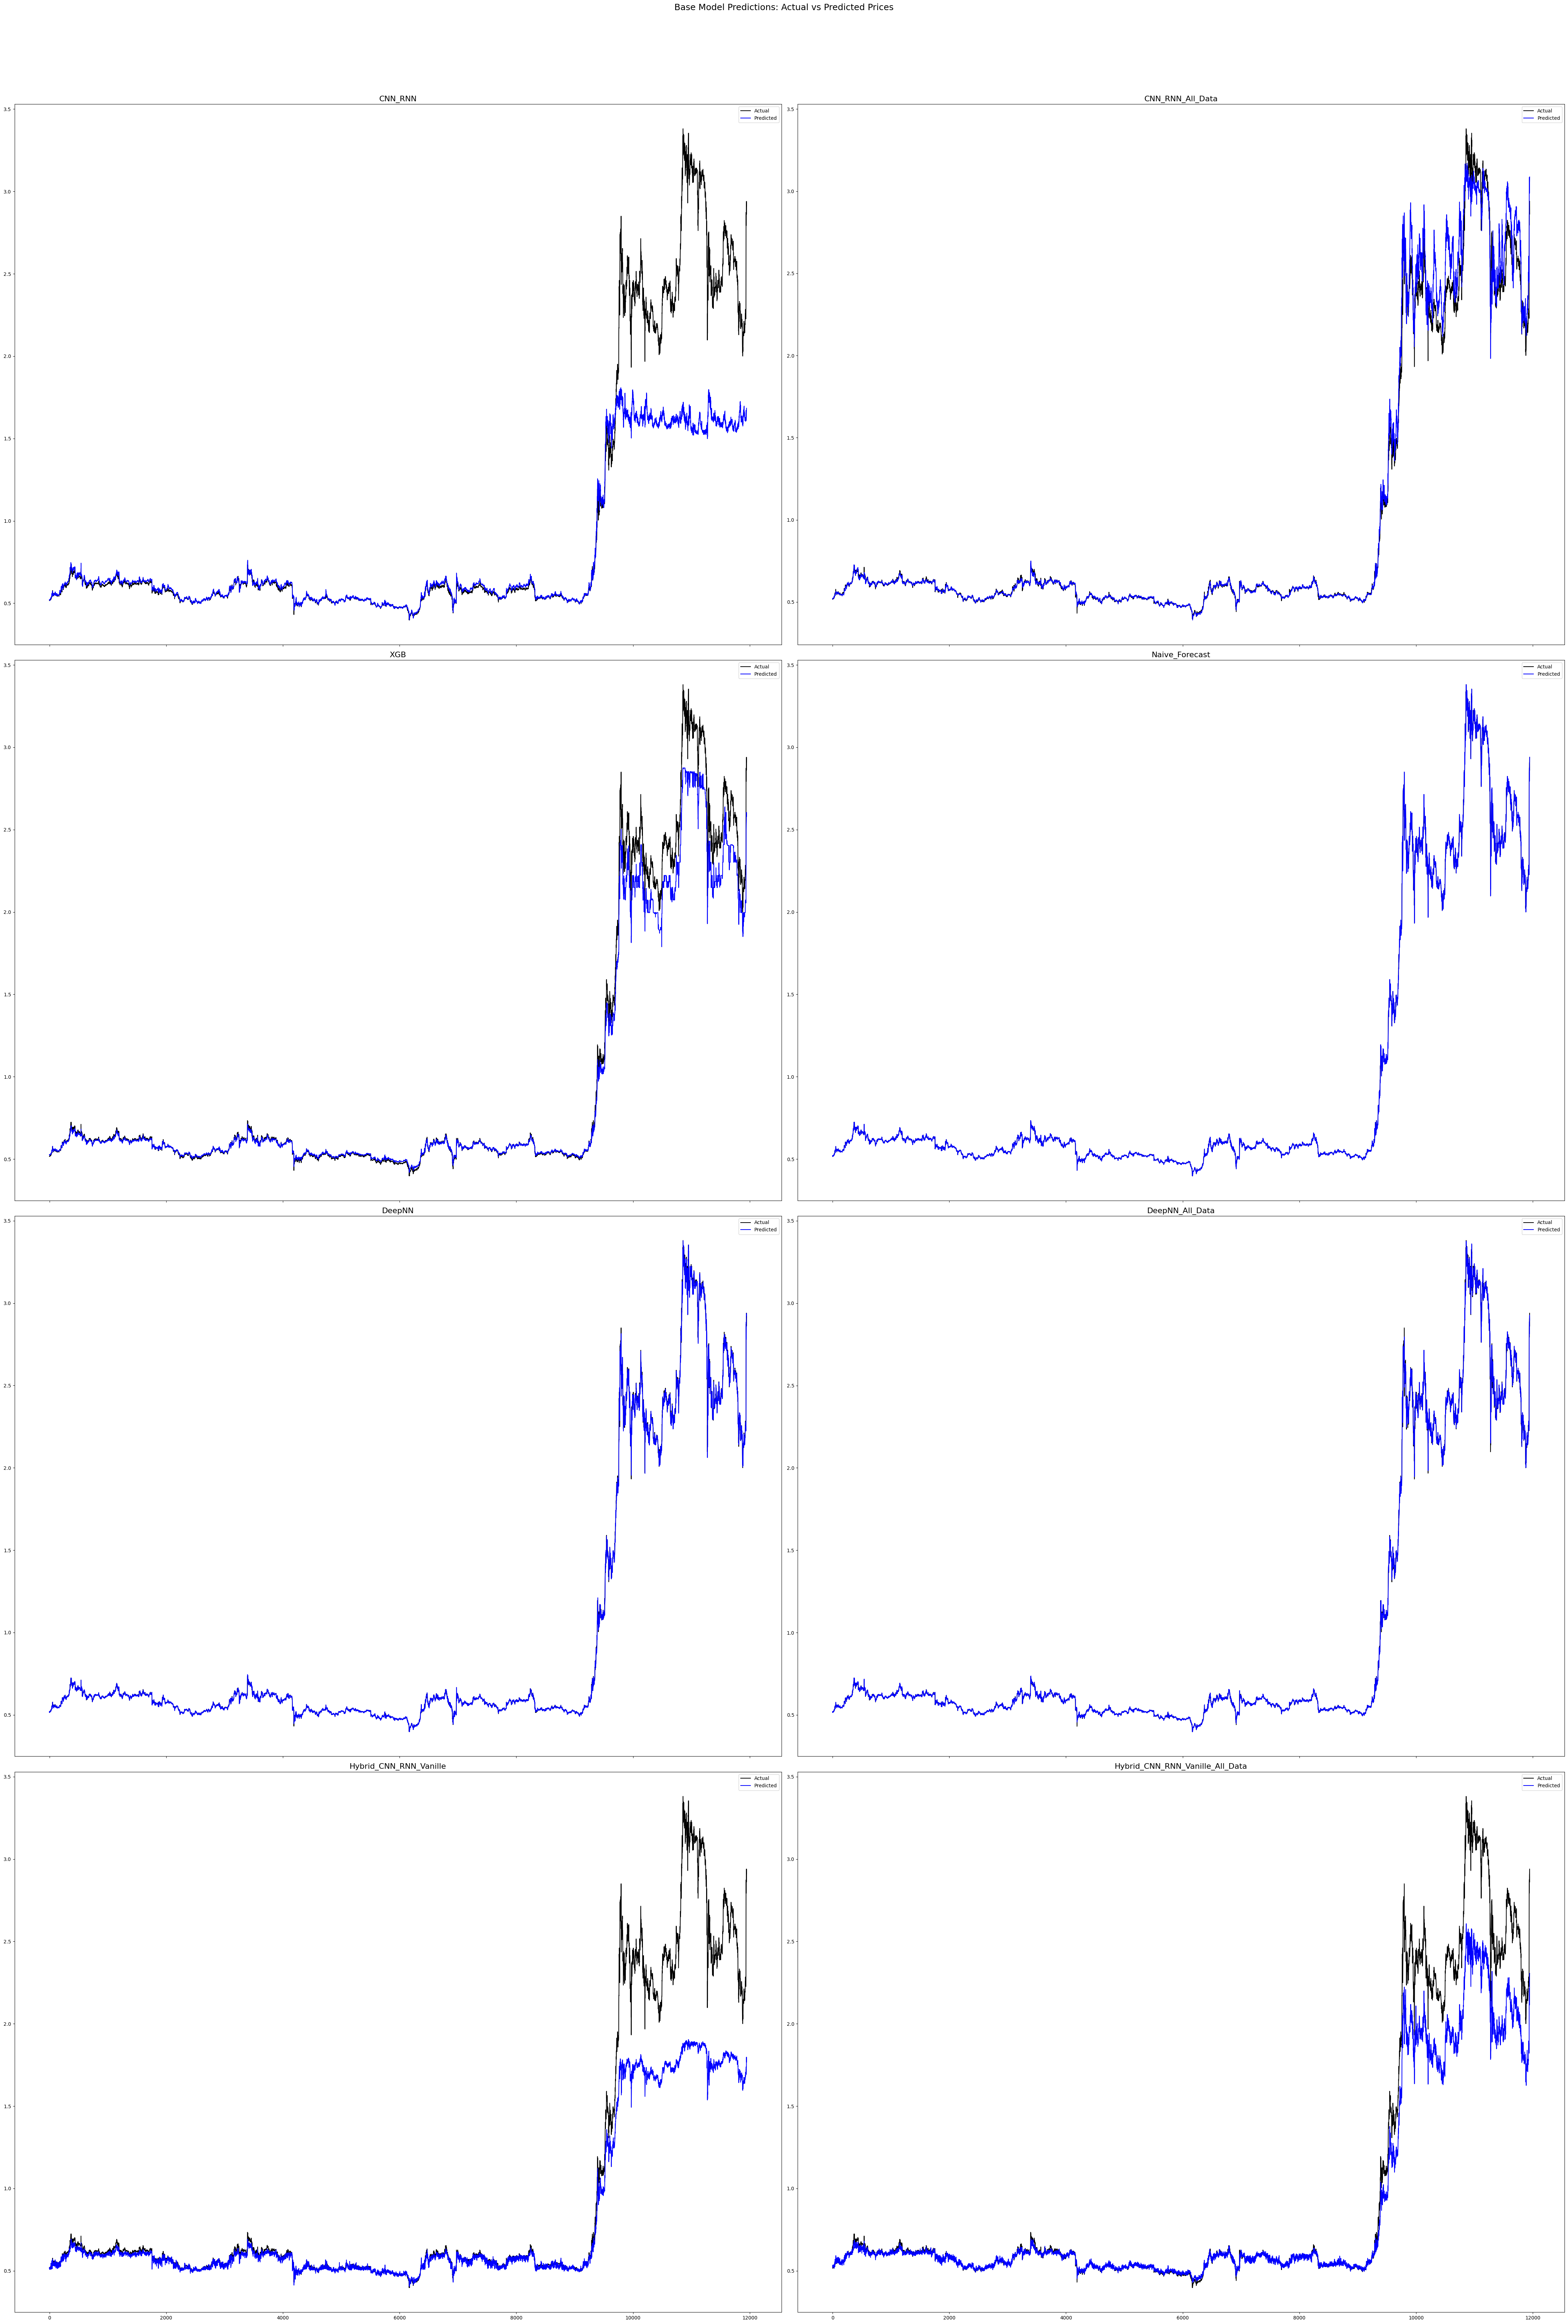

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                          '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']
    
    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df

    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                 self.price_cols,
                                                 self.volatility_cols,
                                                 self.momentum_cols,
                                                 self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== New Deep Neural Network Model ======================
class DeepNN:
    def __init__(self, input_shape):
        self.input_dim = input_shape[0] * input_shape[1]
        self.model = self._build_model(self.input_dim)
    
    def _build_model(self, input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        x = Dense(512, activation='relu')(inputs)
        x = Dense(512, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        Dropout(0.2)(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=35):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                          epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=epochs, batch_size=64,
                          callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                    validation_data=validation_data,
                    epochs=epochs,
                    callbacks=[EarlyStopping(patience=10)],
                    batch_size=32,
                    verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)
    
    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(64, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=validation_data,
                     callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                     verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")

# Special case for models you want to keep using schedules
"""def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    # For schedule-preserving adjustment
    if hasattr(model.optimizer, 'learning_rate'):
        if isinstance(model.optimizer.learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
            # Create new schedule based on original parameters
            original_schedule = model.optimizer.learning_rate
            new_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=new_lr,
                decay_steps=original_schedule.decay_steps,
                decay_rate=original_schedule.decay_rate
            )
            model.optimizer.learning_rate = new_schedule
            print(f"Updated schedule to start with {new_lr}")
        else:
            model.optimizer.learning_rate = new_lr
        
    # Rest of dropout logic remains the same...
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            old_rate = layer.rate
            layer.rate = new_dropout_rate
            print(f"Updated dropout rate in {layer.name}: {old_rate} -> {new_dropout_rate}")
    return model"""

# Replace the existing helper function with this updated version
def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    """Universal solution handling all optimizer types"""
    if hasattr(model.optimizer, 'learning_rate'):
        # Always create new optimizer to avoid dtype issues
        optimizer_config = model.optimizer.get_config()
        
        # Remove problematic schedule parameters
        for key in ['learning_rate', 'lr']:
            if key in optimizer_config:
                del optimizer_config[key]
        
        # Create new optimizer with fixed learning rate
        new_optimizer = model.optimizer.__class__(
            learning_rate=new_lr,
            **{k:v for k,v in optimizer_config.items() if k != 'name'}
        )
        
        # Recompile with original loss and explicit metrics
        model.compile(
            optimizer=new_optimizer,
            loss=model.loss,
            metrics=['mae', 'mse']  # Match original metrics
        )
        print(f"Set learning rate to {new_lr}")
    
    # Update dropout rates
    for layer in model.layers:
        if isinstance(layer, Dropout):
            layer.rate = new_dropout_rate
    
    return model
# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
    
    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds
        ]
        return np.column_stack(base_preds)

    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32, freeze_ratio=0.6):
        print("\nStarting fine-tuning on daily dataset...")
        split_idx = int(len(X_daily) * 0.8)
        X_daily_train = X_daily[:split_idx]
        X_daily_val = X_daily[split_idx:]
        y_daily_train = y_daily[:split_idx]
        y_daily_val = y_daily[split_idx:]
        
        for key in self.models:
            if key != 'xgb':
                print(f"\nAdjusting model {key} for fine-tuning:")
                freeze_model_layers(self.models[key].model, freeze_ratio=freeze_ratio)
                if hasattr(self.models[key].model, 'reset_states'):
                    self.models[key].model.reset_states()
                adjust_model_for_finetuning(self.models[key].model, new_lr=1e-5, new_dropout_rate=0.1)

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        print("\nFine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nPreparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily_train = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("\nFine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily_train, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("Fine-tuning completed.")

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])

    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((8,)),
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape),
        'deep_nn_all_data': DeepNN(input_shape)
    }

    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()

    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()

    # Evaluate meta-model performance on the test set
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')

    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }

    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()

    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()

    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')

    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN': deep_nn_preds,
        'DeepNN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds
    }

    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds) / y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    fig, axs = plt.subplots(4, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}", fontsize=16)
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()

In [21]:
# After initial training and model saving
# --------------------------------------------------
# 1. Load daily data
daily_df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\new trial\daily_dataset_with_features.csv")

# 2. Preprocess with existing scalers
X_daily_scaled, _, y_daily_scaled, _, _, _, _, _ = pipeline.preprocess_data(
    daily_df,
    fit_scalers=False,
    save_scalers=False
)

# 3. Initialize ensemble and load models
ensemble = TemporalEnsemble(pipeline, models)
ensemble.load_models()

# 4. Perform fine-tuning with fixed metrics
ensemble.fine_tune(
    X_daily=X_daily_scaled,
    y_daily=y_daily_scaled,
    fine_tune_epochs=15,
    batch_size=16,
    freeze_ratio=0.6
)

# 5. Save updated models
ensemble.save_models()

Starting data preprocessing...
Data preprocessing finished. Training samples: 1918, Test samples: 480

Loading models and pipeline...
All models loaded successfully

Starting fine-tuning on daily dataset...

Adjusting model cnn_rnn for fine-tuning:
Frozen 5/9 layers (first 60%).
Set learning rate to 1e-05

Adjusting model cnn_rnn_all_data for fine-tuning:
Frozen 5/9 layers (first 60%).
Set learning rate to 1e-05

Adjusting model hybrid_cnn_rnn_vanille for fine-tuning:
Frozen 8/14 layers (first 60%).
Set learning rate to 1e-05

Adjusting model hybrid_cnn_rnn_vanille_all_data for fine-tuning:
Frozen 8/14 layers (first 60%).
Set learning rate to 1e-05

Adjusting model meta for fine-tuning:
Frozen 6/10 layers (first 60%).
Set learning rate to 1e-05

Adjusting model deep_nn for fine-tuning:
Frozen 10/18 layers (first 60%).
Set learning rate to 1e-05

Adjusting model deep_nn_all_data for fine-tuning:
Frozen 10/18 layers (first 60%).
Set learning rate to 1e-05

Fine-tuning HybridCNNRNN model.

In [22]:
newdata = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\newdata2_xrp.csv")

In [24]:
newdata.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
newdata.columns = ['open', 'high', 'low', 'close', 'volume', 'av_pr', 'diff', 'candle',
       '7_hour_SMA', '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', 'RSI',
       '12_hour_EMA', '26_hour_EMA', 'MACD', 'Signal_Line', '20_hour_SMA',
       '20_hour_STD', 'Upper_Band', 'Lower_Band', 'lag_1', 'lag_2', 'lag_3']

In [27]:
# Assume new_day_df is a DataFrame containing at least 30 rows of new data.
# Make sure it has the same feature columns as used in training.
predicted_close, base_model_predictions = ensemble.predict_next_day(newdata)

print("Predicted next day close price:", predicted_close)

Predicted next day close price: 2.163006998877526


In [28]:
base_model_predictions

[np.float64(1.5651850716143851),
 np.float64(2.0313145827746397),
 np.float64(2.2827),
 np.float64(1.5733249818569424),
 np.float64(2.33639084132433),
 np.float64(2.295131443804503),
 np.float64(1.8050635952281957),
 np.float64(2.0381810468614106)]

In [26]:
newdata

open    high     low   close        volume    av_pr    diff  candle  \
0   3.0552  3.2140  3.0062  3.0572  3.694708e+08  3.11010  0.0020       1   
1   3.0572  3.1363  2.9673  3.0683  2.547567e+08  3.05180  0.0111       1   
2   3.0683  3.1544  3.0466  3.1276  1.731433e+08  3.10050  0.0593       1   
3   3.1276  3.1333  3.0030  3.0361  1.622353e+08  3.06815 -0.0915       0   
4   3.0361  3.0727  2.8281  2.8778  1.736014e+08  2.95040 -0.1583       0   
5   2.8779  2.9559  2.4603  2.5800  6.840890e+08  2.70810 -0.2979       0   
6   2.5801  2.7814  1.7711  2.7001  1.866759e+09  2.27625  0.1200       1   
7   2.7000  2.7874  2.4209  2.5274  6.215530e+08  2.60415 -0.1726       0   
8   2.5275  2.5692  2.3384  2.3810  3.388151e+08  2.45380 -0.1465       0   
9   2.3810  2.4699  2.2772  2.3250  3.228969e+08  2.37355 -0.0560       0   
10  2.3251  2.5420  2.2655  2.3968  4.474879e+08  2.40375  0.0717       1   
11  2.3969  2.4372  2.3506  2.4190  1.547172e+08  2.39390  0.0221       1   
12  2.4190  2.5079  2.3113  2.3928  2.042056e+08  2.40960 -0.0262       0   
13  2.3928  2.4733  2.3235  2.4237  2.072579e+08  2.39840  0.0309       1   
14  2.4238  2.5290  2.3708  2.4131  2.481822e+08  2.44990 -0.0107       0   
15  2.4130  2.4962  2.3323  2.4734  2.279576e+08  2.41425  0.0604       1   
16  2.4734  2.6061  2.4154  2.5599  2.124787e+08  2.51075  0.0865       1   
17  2.5600  2.8356  2.5300  2.7384  4.075411e+08  2.68280  0.1784       1   
18  2.7384  2.8335  2.7130  2.7619  1.841819e+08  2.77325  0.0235       1   
19  2.7619  2.8054  2.6879  2.7283  1.323880e+08  2.74665 -0.0336       0   
20  2.7283  2.7648  2.6075  2.6599  2.128134e+08  2.68615 -0.0684       0   
21  2.6599  2.6699  2.4693  2.5628  2.271700e+08  2.56960 -0.0971       0   
22  2.5629  2.7470  2.5121  2.7378  2.082227e+08  2.62955  0.1749       1   
23  2.7378  2.7490  2.6671  2.6877  1.612137e+08  2.70805 -0.0501       0   
24  2.6878  2.7160  2.5076  2.5721  2.577542e+08  2.61180 -0.1157       0   
25  2.5722  2.6099  2.5505  2.5740  9.251666e+07  2.58020  0.0018       1   
26  2.5740  2.6016  2.5201  2.5763  9.150695e+07  2.56085  0.0023       1   
27  2.5763  2.6090  2.2336  2.2783  3.518287e+08  2.42130 -0.2980       0   
28  2.2784  2.3663  2.0637  2.3222  7.638483e+08  2.21500  0.0438       1   
29  2.3222  2.3314  2.1948  2.2827  2.114703e+08  2.26310 -0.0395       0   

    7_hour_SMA  30_hour_SMA  ...  26_hour_EMA      MACD  Signal_Line  \
0     3.091900     2.731070  ...     2.859802  0.174865     0.196891   
1     3.075900     2.764723  ...     2.875246  0.164595     0.190432   
2     3.077071     2.799523  ...     2.893939  0.159403     0.184226   
3     3.067814     2.822967  ...     2.904470  0.146220     0.176625   
4     3.034929     2.838813  ...     2.902494  0.121597     0.165619   
5     2.971743     2.842990  ...     2.878606  0.077164     0.147928   
6     2.921014     2.852323  ...     2.865383  0.051053     0.128553   
7     2.845329     2.856590  ...     2.840347  0.016237     0.106090   
8     2.747143     2.855290  ...     2.806321 -0.022904     0.080291   
9     2.632486     2.857083  ...     2.770668 -0.057776     0.052678   
10    2.541157     2.857873  ...     2.742974 -0.078712     0.026400   
11    2.475614     2.862767  ...     2.718976 -0.092446     0.002631   
12    2.448871     2.864480  ...     2.694815 -0.104244    -0.018744   
13    2.409386     2.859390  ...     2.674732 -0.109834    -0.036962   
14    2.393057     2.856340  ...     2.655352 -0.113807    -0.052331   
15    2.406257     2.854680  ...     2.641874 -0.110813    -0.064028   
16    2.439814     2.851100  ...     2.635802 -0.100304    -0.071283   
17    2.488614     2.837617  ...     2.643402 -0.076688    -0.072364   
18    2.537600     2.821510  ...     2.652179 -0.055437    -0.068979   
19    2.585529     2.802713  ...     2.657818 -0.040836    -0.063350   
20    2.619271     2.782387  ...     2.657972 -0.034388    -0.057558   
21    2.640657     2.769190  ...  

PINN Version

Starting data preprocessing...
Data preprocessing finished. Training samples: 47780, Test samples: 11946


c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\layers\layer.py:393: UserWarning: `build()` was called on layer 'pinn_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\layers\layer.py:393: UserWarning: `build()` was called on layer 'pinn_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(



Training base CNN-RNN...
Epoch 1/70
1494/1494 - 135s - 90ms/step - loss: 0.0347 - mae: 0.1657 - mse: 0.0716 - val_loss: 0.5723 - val_mae: 0.5963 - val_mse: 1.9170
Epoch 2/70
1494/1494 - 101s - 67ms/step - loss: 0.0168 - mae: 0.1201 - mse: 0.0337 - val_loss: 0.5633 - val_mae: 0.5874 - val_mse: 1.8882
Epoch 3/70
1494/1494 - 93s - 62ms/step - loss: 0.0138 - mae: 0.1083 - mse: 0.0276 - val_loss: 0.5992 - val_mae: 0.6139 - val_mse: 2.1177
Epoch 4/70
1494/1494 - 91s - 61ms/step - loss: 0.0122 - mae: 0.1019 - mse: 0.0245 - val_loss: 0.6322 - val_mae: 0.6500 - val_mse: 2.2416
Epoch 5/70
1494/1494 - 91s - 61ms/step - loss: 0.0116 - mae: 0.0988 - mse: 0.0233 - val_loss: 0.5470 - val_mae: 0.5701 - val_mse: 1.8554
Epoch 6/70
1494/1494 - 91s - 61ms/step - loss: 0.0111 - mae: 0.0963 - mse: 0.0221 - val_loss: 0.5473 - val_mae: 0.5712 - val_mse: 1.8541
Epoch 7/70
1494/1494 - 90s - 60ms/step - loss: 0.0111 - mae: 0.0953 - mse: 0.0222 - val_loss: 0.6142 - val_mae: 0.6233 - val_mse: 2.1624
Epoch 8/70
14

c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
  current = self.get_monitor_value(logs)


934/934 - 12s - 13ms/step - loss: -5.0060e-02 - mae: 0.1513 - mse: 0.0482
Epoch 3/35
934/934 - 12s - 13ms/step - loss: -6.0174e-02 - mae: 0.1428 - mse: 0.0426
Epoch 4/35
934/934 - 13s - 14ms/step - loss: -6.5024e-02 - mae: 0.1352 - mse: 0.0399
Epoch 5/35
934/934 - 12s - 13ms/step - loss: -7.1090e-02 - mae: 0.1271 - mse: 0.0366
Epoch 6/35
934/934 - 12s - 13ms/step - loss: -7.3737e-02 - mae: 0.1212 - mse: 0.0356
Epoch 7/35
934/934 - 12s - 13ms/step - loss: -7.6117e-02 - mae: 0.1157 - mse: 0.0345
Epoch 8/35
934/934 - 12s - 13ms/step - loss: -7.7950e-02 - mae: 0.1118 - mse: 0.0337
Epoch 9/35
934/934 - 12s - 13ms/step - loss: -7.9512e-02 - mae: 0.1083 - mse: 0.0332
Epoch 10/35
934/934 - 12s - 13ms/step - loss: -8.0462e-02 - mae: 0.1061 - mse: 0.0327
Epoch 11/35
934/934 - 12s - 13ms/step - loss: -8.0922e-02 - mae: 0.1044 - mse: 0.0324
Epoch 12/35
934/934 - 12s - 13ms/step - loss: -8.1387e-02 - mae: 0.1029 - mse: 0.0322
Epoch 13/35
934/934 - 12s - 13ms/step - loss: -8.1710e-02 - mae: 0.1020 -

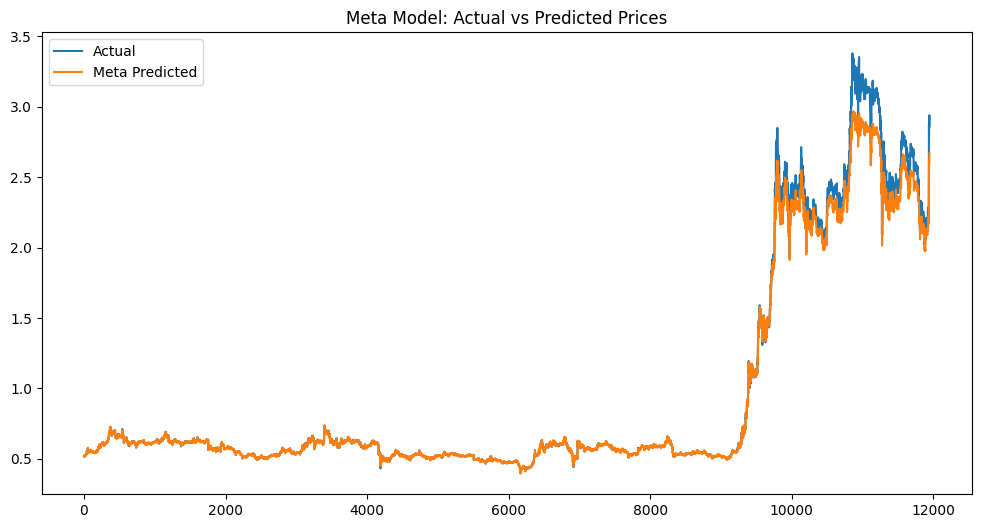

374/374 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step
374/374 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step

Base Model Performance Metrics:
CNN_RNN - MAE: 0.1804, RMSE: 0.4247, MAPE: 7.91%
CNN_RNN_All_Data - MAE: 0.0328, RMSE: 0.0753, MAPE: 1.89%
XGB - MAE: 0.0526, RMSE: 0.1088, MAPE: 2.87%
Naive_Forecast - MAE: 0.0068, RMSE: 0.0164, MAPE: 0.57%
DeepNN_PINN - MAE: 0.0410, RMSE: 0.0819, MAPE: 3.85%
DeepNN_PINN_All_Data - MAE: 0.0436, RMSE: 0.0818, MAPE: 4.34%
Hybrid_CNN_RNN_Vanille - MAE: 0.1607, RMSE: 0.3568, MAPE: 7.76%
Hybrid_CNN_RNN_Vanille_All_Data - MAE: 0.1087, RMSE: 0.2280, MAPE: 5.53%


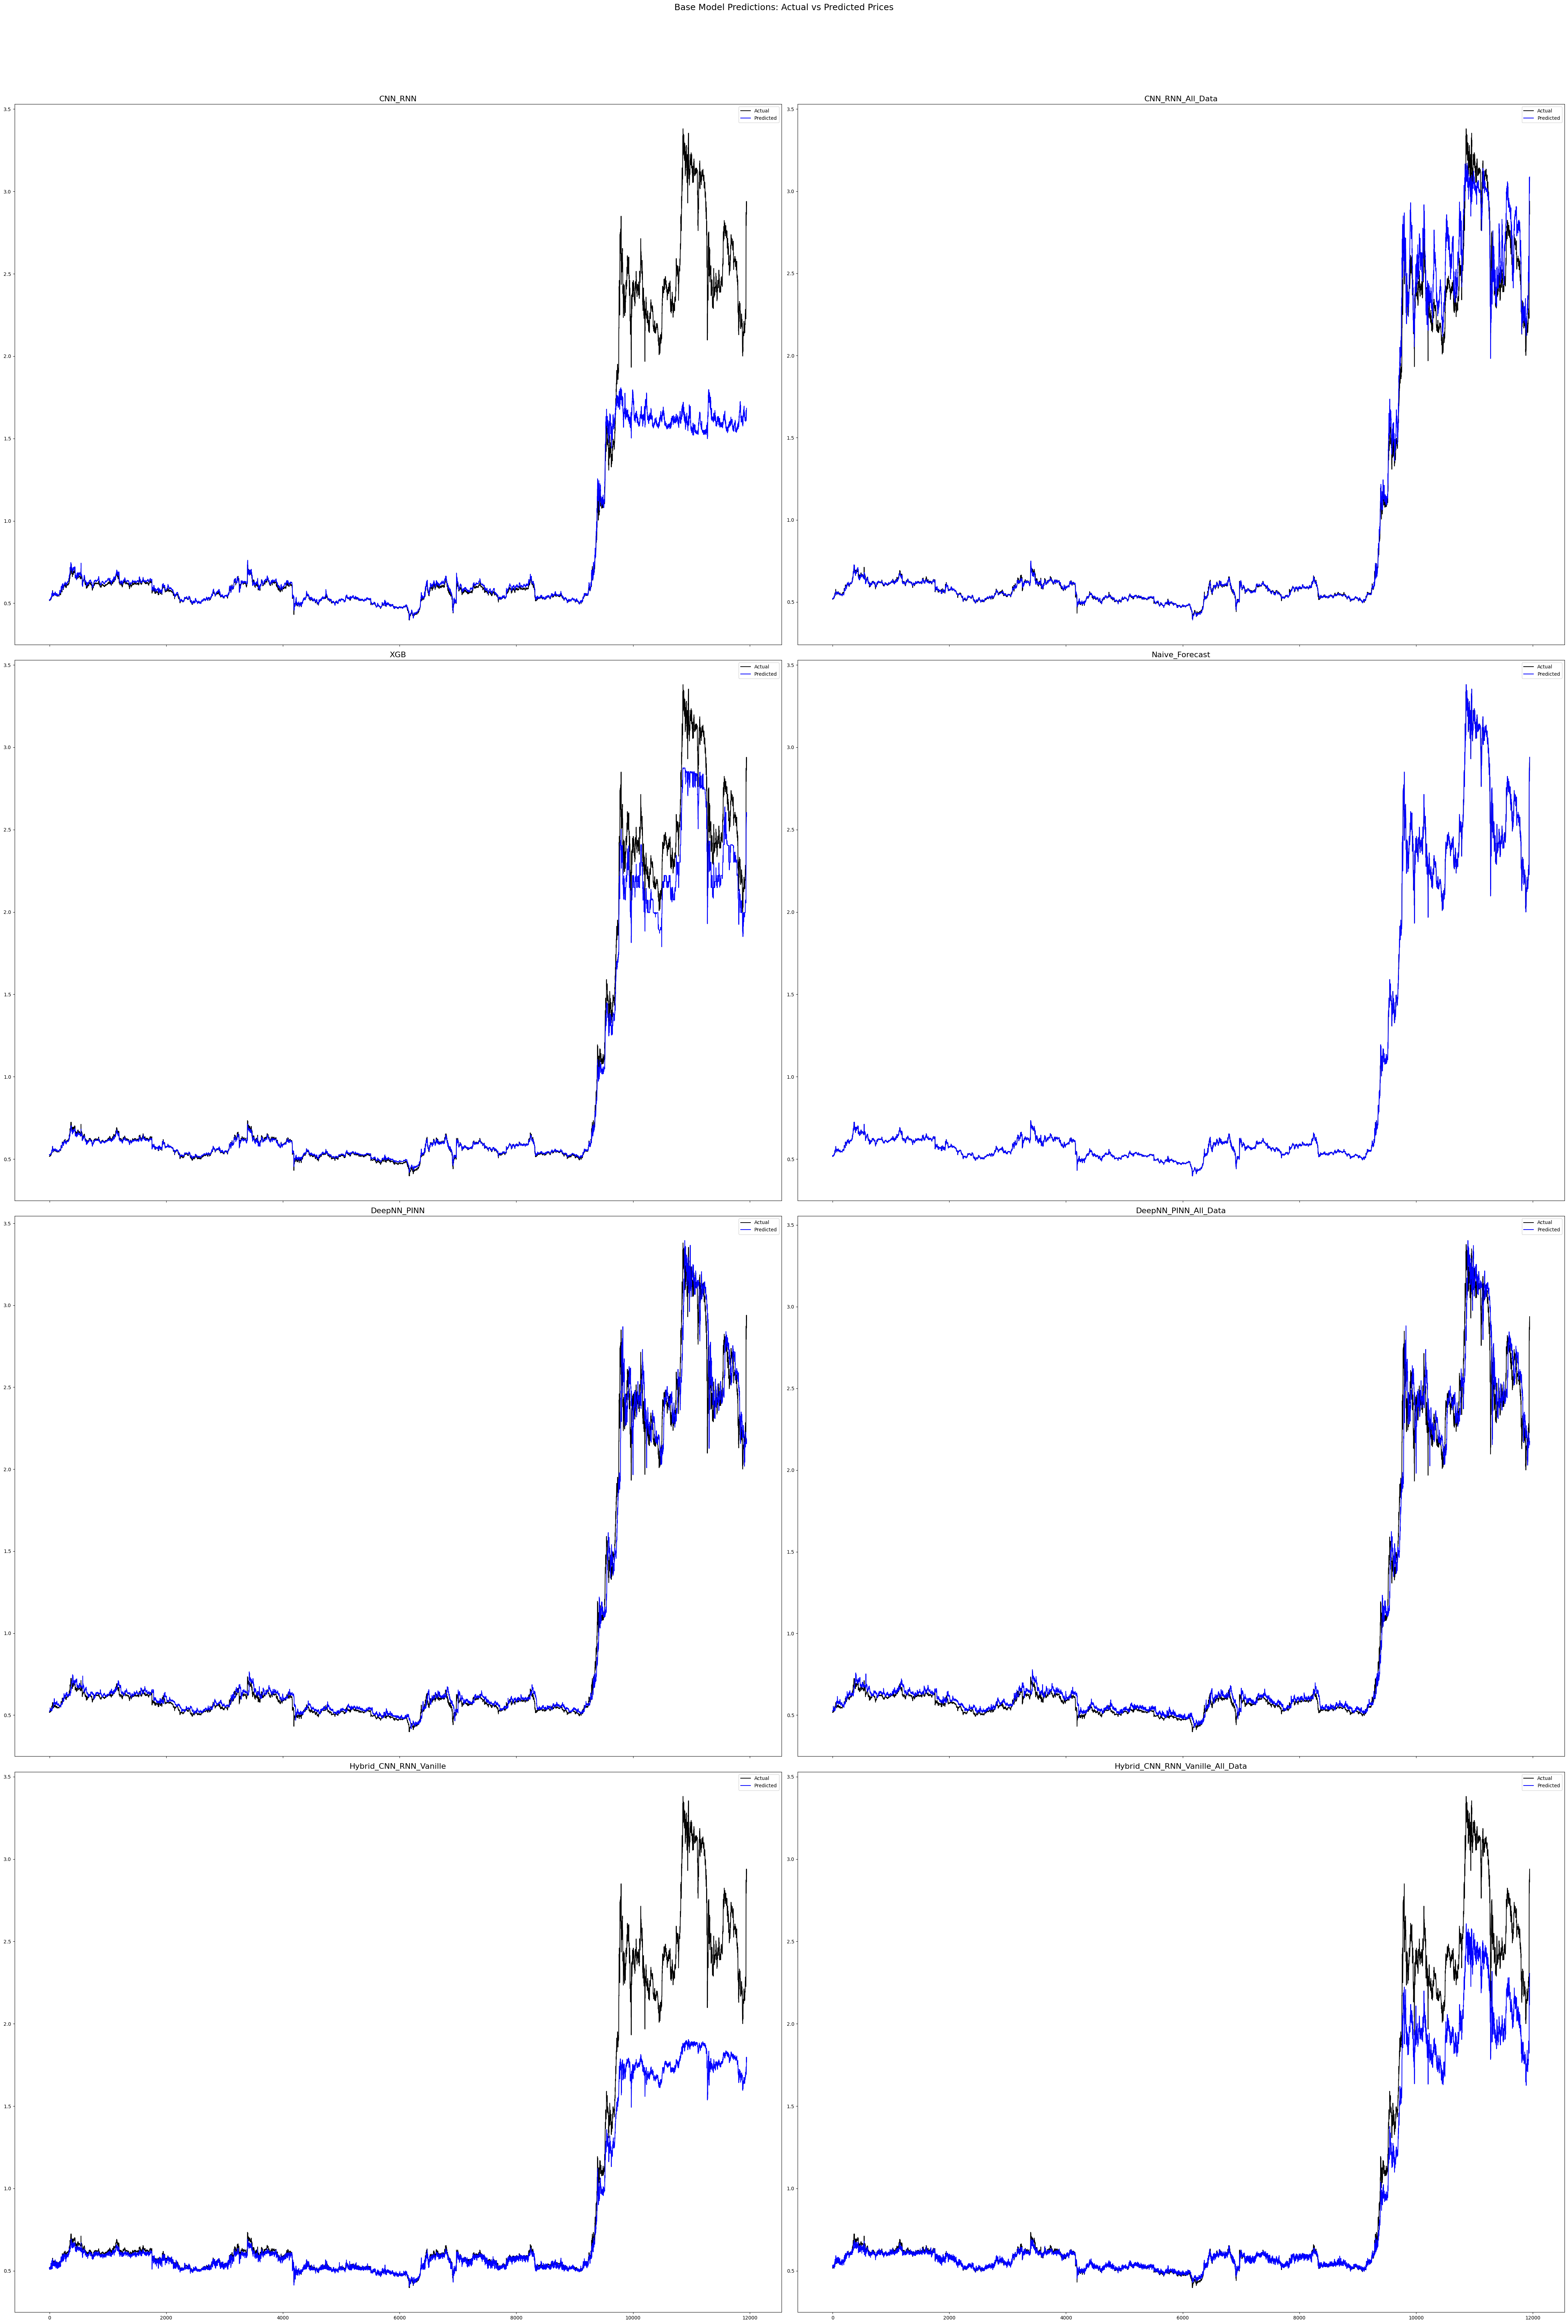

In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                          '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']
    
    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df

    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                 self.price_cols,
                                                 self.volatility_cols,
                                                 self.momentum_cols,
                                                 self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== PINN Deep Neural Network Model ======================
class DeepNN:
    def __init__(self, input_shape, price_index=0, volume_index=4, lambda_corr=0.1):
        """Initialize the DeepNN model with PINN capabilities.

        Args:
            input_shape (tuple): Shape of a single input sample (e.g., (seq_length, features)).
            price_index (int): Index of the price in the flattened input (default: 0).
            volume_index (int): Index of the volume in the flattened input (default: 4).
            lambda_corr (float): Weight of the correlation loss (default: 0.1).
        """
        self.input_dim = np.prod(input_shape)  # Flatten the input shape
        self.price_index = price_index
        self.volume_index = volume_index
        self.lambda_corr = lambda_corr
        self.model = self._build_model(self.input_dim)
    
    def _build_model(self, input_dim):
        """Build and compile the PINN model.

        Args:
            input_dim (int): Flattened input dimension.

        Returns:
            PINNModel: Compiled PINN model.
        """
        class PINNModel(tf.keras.Model):
            def __init__(self, input_dim, price_index, volume_index, lambda_corr):
                super(PINNModel, self).__init__()
                self.price_index = price_index
                self.volume_index = volume_index
                self.lambda_corr = lambda_corr
                
                # Define the neural network layers
                self.dense1 = Dense(512, activation='relu')
                self.dense2 = Dense(512, activation='relu')
                self.dense3 = Dense(256, activation='relu')
                self.dense4 = Dense(256, activation='relu')
                self.dense5 = Dense(128, activation='relu')
                self.dense6 = Dense(128, activation='relu')
                self.dense7 = Dense(64, activation='relu')
                self.dense8 = Dense(64, activation='relu')
                self.dense9 = Dense(32, activation='relu')
                self.dense10 = Dense(64, activation='relu')
                self.dense11 = Dense(64, activation='relu')
                self.dense12 = Dense(64, activation='relu')
                self.dense13 = Dense(64, activation='relu')
                self.dense14 = Dense(32, activation='relu')
                self.dense15 = Dense(32, activation='relu')
                self.dense16 = Dense(32, activation='relu')
                self.output_layer = Dense(1)
                
            def call(self, inputs, training=False):
                x = self.dense1(inputs)
                x = self.dense2(x)
                x = self.dense3(x)
                x = self.dense4(x)
                x = self.dense5(x)
                x = self.dense6(x)
                x = self.dense7(x)
                x = self.dense8(x)
                x = self.dense9(x)
                x = self.dense10(x)
                x = self.dense11(x)
                x = self.dense12(x)
                x = self.dense13(x)
                x = self.dense14(x)
                x = self.dense15(x)
                x = self.dense16(x)
                y_pred = self.output_layer(x)
                
                # Physics-informed loss calculation
                p_t = inputs[:, self.price_index]  # Current price at time t
                V_t = inputs[:, self.volume_index]  # Volume at time t
                delta_p_pred = y_pred[:, 0] - p_t  # Predicted price change
                abs_delta_p_pred = tf.abs(delta_p_pred)  # Absolute price change
                
                # Compute Pearson correlation between abs_delta_p_pred and V_t
                x = abs_delta_p_pred
                y = V_t
                x_mean = tf.reduce_mean(x)
                y_mean = tf.reduce_mean(y)
                x_centered = x - x_mean
                y_centered = y - y_mean
                numerator = tf.reduce_sum(x_centered * y_centered)
                denominator = tf.sqrt(tf.reduce_sum(x_centered**2) * tf.reduce_sum(y_centered**2)) + 1e-8
                correlation = numerator / denominator
                
                # Add physics loss to encourage positive correlation
                self.add_loss(-self.lambda_corr * correlation)
                
                return y_pred

        model = PINNModel(input_dim, price_index=self.price_index, volume_index=self.volume_index, lambda_corr=self.lambda_corr)
        model.build((None, input_dim))  # Define input shape
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.Huber(delta=1.3),
                      metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=35):
        """Train the model with the given data.

        Args:
            X_train (np.ndarray): Training input data.
            y_train (np.ndarray): Training target data.
            validation_data (tuple, optional): Validation data as (X_val, y_val).
            epochs (int): Number of training epochs (default: 35).
        """
        X_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten input
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                           epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=epochs, batch_size=64,
                           callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        """Make predictions with the trained model.

        Args:
            X (np.ndarray): Input data for prediction.

        Returns:
            np.ndarray: Predicted values.
        """
        X_flat = X.reshape(X.shape[0], -1)  # Flatten input
        return self.model.predict(X_flat)

# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                    validation_data=validation_data,
                    epochs=epochs,
                    callbacks=[EarlyStopping(patience=10)],
                    batch_size=32,
                    verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)
    
    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(64, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=validation_data,
                     callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                     verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")

# Replace the existing helper function with this updated version
def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    """Universal solution handling all optimizer types"""
    if hasattr(model.optimizer, 'learning_rate'):
        optimizer_config = model.optimizer.get_config()
        for key in ['learning_rate', 'lr']:
            if key in optimizer_config:
                del optimizer_config[key]
        new_optimizer = model.optimizer.__class__(
            learning_rate=new_lr,
            **{k:v for k,v in optimizer_config.items() if k != 'name'}
        )
        model.compile(
            optimizer=new_optimizer,
            loss=model.loss,
            metrics=['mae', 'mse']
        )
        print(f"Set learning rate to {new_lr}")
    
    for layer in model.layers:
        if isinstance(layer, Dropout):
            layer.rate = new_dropout_rate
    
    return model

# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
    
    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds
        ]
        return np.column_stack(base_preds)

    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        self.models['deep_nn'].model.save(os.path.join(self.model_dir, "deep_nn_model.keras"))
        self.models['deep_nn_all_data'].model.save(os.path.join(self.model_dir, "deep_nn_all_data_model.keras"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'xgb': "xgb_model.json",
            'deep_nn': "deep_nn_model.keras",
            'deep_nn_all_data': "deep_nn_all_data_model.keras"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32, freeze_ratio=0.6):
        print("\nStarting fine-tuning on daily dataset...")
        split_idx = int(len(X_daily) * 0.8)
        X_daily_train = X_daily[:split_idx]
        X_daily_val = X_daily[split_idx:]
        y_daily_train = y_daily[:split_idx]
        y_daily_val = y_daily[split_idx:]
        
        for key in self.models:
            if key != 'xgb':
                print(f"\nAdjusting model {key} for fine-tuning:")
                freeze_model_layers(self.models[key].model, freeze_ratio=freeze_ratio)
                if hasattr(self.models[key].model, 'reset_states'):
                    self.models[key].model.reset_states()
                adjust_model_for_finetuning(self.models[key].model, new_lr=1e-5, new_dropout_rate=0.1)

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        print("\nFine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nPreparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily_train = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("\nFine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily_train, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("Fine-tuning completed.")

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])

    # Adjust indices based on flattened input: (seq_length, num_features) -> seq_length * num_features
    num_features = input_shape[1]
    price_index = 3  # 'close' is at index 3 in price_cols, assuming flat index = seq_length-1 * num_features + 3
    volume_index = pipeline.price_cols.index('close') + 1  # Assuming 'volume' follows price_cols in the DataFrame
    
    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((8,)),
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape, price_index=price_index, volume_index=volume_index, lambda_corr=0.1),
        'deep_nn_all_data': DeepNN(input_shape, price_index=price_index, volume_index=volume_index, lambda_corr=0.1)
    }

    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()

    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()

    # Evaluate meta-model performance on the test set
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')

    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }

    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()

    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()

    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')

    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN_PINN': deep_nn_preds,
        'DeepNN_PINN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds
    }

    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds) / y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    fig, axs = plt.subplots(4, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}", fontsize=16)
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                          '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']
    
    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df

    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                 self.price_cols,
                                                 self.volatility_cols,
                                                 self.momentum_cols,
                                                 self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== New Deep Neural Network Model ======================
class DeepNN:
    def __init__(self, input_shape):
        self.input_dim = input_shape[0] * input_shape[1]
        self.model = self._build_model(self.input_dim)
    
    def _build_model(self, input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        x = Dense(512, activation='relu')(inputs)
        x = Dense(512, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        Dropout(0.2)(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=35):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                          epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=epochs, batch_size=64,
                          callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)
    

# ====================== Physics-Informed Neural Network ======================
class PhysicsMetrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.X_val, self.y_val = validation_data
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        predictions = self.model.predict(self.X_val, verbose=0)
        returns = predictions[:, 1:] - predictions[:, :-1]
        
        # Basic metrics
        neg_returns = tf.reduce_mean(tf.cast(returns < 0, tf.float32))
        volatility = tf.math.reduce_std(returns)
        mean_dev = tf.reduce_mean(tf.abs(predictions - tf.reduce_mean(predictions, axis=1, keepdims=True)))
        
        # Advanced constraint metrics
        volume = self.model.input[:, :, 4]  # Adjust index based on your feature order
        arb_value = tf.reduce_mean(tf.nn.relu(-(returns - 0.0001))).numpy()
        demand_corr = tf.reduce_mean(returns * (volume[:, 1:] - volume[:, :-1])).numpy()
        
        logs.update({
            'val_neg_returns': neg_returns.numpy(),
            'val_volatility': volatility.numpy(),
            'val_mean_dev': mean_dev.numpy(),
            'val_arbitrage': arb_value,
            'val_demand_corr': demand_corr
        })

class PhysicsInformedNN:
    def __init__(self, input_shape, physics_weight=0.3, 
                 use_black_scholes=False, risk_free_rate=0.0001):
        self.input_shape = input_shape
        self.physics_weight = physics_weight
        self.risk_free_rate = risk_free_rate
        self.use_black_scholes = use_black_scholes
        self.model = self._build_model()
        self.history = {}

    def _build_model(self):
        inputs = Input(shape=self.input_shape)
        
        # Temporal features branch
        x = Bidirectional(LSTM(64, return_sequences=False))(inputs)  # Returns 2D output
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        
        # Physics-guided features branch
        px = Conv1D(32, 3, activation='relu')(inputs)
        px = MaxPooling1D(2)(px)
        px = Bidirectional(GRU(32))(px)  # Returns 2D output
        
        # Combine branches using Keras Concatenate layer
        combined = tf.keras.layers.Concatenate()([x, px])
        
        x = Dense(64, activation='relu')(combined)
        x = Dropout(0.3)(x)
        outputs = Dense(1)(x)
        
        model = Model(inputs, outputs)
        model.compile(
            optimizer=Adam(0.001),
            loss=self.combined_loss,
            metrics=['mae', 'mse']
        )
        return model


    def combined_loss(self, y_true, y_pred):
        data_loss = tf.reduce_mean(tf.square(y_true - y_pred))
        physics_loss = self._financial_constraints(y_pred)
        return data_loss + self.physics_weight * physics_loss

    def _financial_constraints(self, predictions):
        """Combined financial physics constraints"""
        # Get input features (adjust indices based on your data structure)
        volume = self.model.input[:, :, 4]  # Volume index
        volatility = self.model.input[:, :, 20]  # Volatility index
        
        # Calculate returns
        returns = predictions[:, 1:] - predictions[:, :-1]
        
        # 1. Price non-negativity constraint
        price_constraint = tf.reduce_mean(tf.square(tf.nn.relu(-predictions)))
        
        # 2. Arbitrage prevention
        excess_returns = returns - self.risk_free_rate
        arb_constraint = tf.reduce_mean(tf.square(tf.nn.relu(-excess_returns)))
        
        # 3. Price-demand relationship
        volume_changes = volume[:, 1:] - volume[:, :-1]
        demand_corr = tf.reduce_mean(returns * volume_changes)
        demand_constraint = tf.square(tf.nn.relu(-demand_corr))
        
        # 4. Volatility bounding
        volatility = tf.math.reduce_std(returns, axis=1) + 1e-7  # Add epsilon
        vol_constraint = tf.reduce_mean(tf.square(tf.nn.relu(volatility - 0.1)))
        
        # 5. Black-Scholes constraint (if enabled)
        bs_constraint = 0.0
        if self.use_black_scholes:
            time_steps = tf.cast(tf.shape(predictions)[1], tf.float32) * (1/24)  # Hourly data
            theoretical = predictions[:, 0] * tf.exp(volatility * tf.sqrt(time_steps))
            bs_constraint = tf.reduce_mean(tf.square(theoretical - predictions[:, -1]))
        
        return (price_constraint + arb_constraint + demand_constraint +
                vol_constraint + bs_constraint)

    def train(self, X_train, y_train, validation_data, epochs=100):
        physics_cb = PhysicsMetrics(validation_data)
        lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)
        
        # Store combined training history
        full_history = {
            'loss': [], 'val_loss': [],
            'val_neg_returns': [], 'val_volatility': [],
            'val_mean_dev': [], 'val_arbitrage': [],
            'val_demand_corr': []
        }
        
        # Curriculum learning
        for phase in [(20, 0.1), (15, 0.3), (10, 0.5)]:
            epochs_phase, weight = phase
            self.physics_weight = weight
            print(f"\nTraining phase with physics weight {weight}:")
            
            history = self.model.fit(
                X_train, y_train,
                validation_data=validation_data,
                epochs=epochs_phase,
                batch_size=32,
                callbacks=[EarlyStopping(patience=8), lr_scheduler, physics_cb],
                verbose=2
            )
            
            # Aggregate history across phases
            for k in full_history.keys():
                if k in history.history:
                    full_history[k].extend(history.history[k])
        
        self.history = full_history
        return full_history

# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                    validation_data=validation_data,
                    epochs=epochs,
                    callbacks=[EarlyStopping(patience=10)],
                    batch_size=32,
                    verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)
    
    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(64, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=validation_data,
                     callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                     verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")

# Special case for models you want to keep using schedules
"""def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    # For schedule-preserving adjustment
    if hasattr(model.optimizer, 'learning_rate'):
        if isinstance(model.optimizer.learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
            # Create new schedule based on original parameters
            original_schedule = model.optimizer.learning_rate
            new_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=new_lr,
                decay_steps=original_schedule.decay_steps,
                decay_rate=original_schedule.decay_rate
            )
            model.optimizer.learning_rate = new_schedule
            print(f"Updated schedule to start with {new_lr}")
        else:
            model.optimizer.learning_rate = new_lr
        
    # Rest of dropout logic remains the same...
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            old_rate = layer.rate
            layer.rate = new_dropout_rate
            print(f"Updated dropout rate in {layer.name}: {old_rate} -> {new_dropout_rate}")
    return model"""

# Replace the existing helper function with this updated version
def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    """Universal solution handling all optimizer types"""
    if hasattr(model.optimizer, 'learning_rate'):
        # Always create new optimizer to avoid dtype issues
        optimizer_config = model.optimizer.get_config()
        
        # Remove problematic schedule parameters
        for key in ['learning_rate', 'lr']:
            if key in optimizer_config:
                del optimizer_config[key]
        
        # Create new optimizer with fixed learning rate
        new_optimizer = model.optimizer.__class__(
            learning_rate=new_lr,
            **{k:v for k,v in optimizer_config.items() if k != 'name'}
        )
        
        # Recompile with original loss and explicit metrics
        model.compile(
            optimizer=new_optimizer,
            loss=model.loss,
            metrics=['mae', 'mse']  # Match original metrics
        )
        print(f"Set learning rate to {new_lr}")
    
    # Update dropout rates
    for layer in model.layers:
        if isinstance(layer, Dropout):
            layer.rate = new_dropout_rate
    
    return model
# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
    
    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining Physics-Informed NN with curriculum learning...")
        self.models['pinn'].train(X_train, y_train, (X_val, y_val))
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        pinn_preds = self.models['pinn'].model.predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds, pinn_preds
        ]
        return np.column_stack(base_preds)

    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['pinn'].model.save(os.path.join(self.model_dir, "pinn_model.keras"))
        self.models['deep_nn'].model.save(os.path.join(self.model_dir, "deep_nn_model.keras"))
        self.models['deep_nn_all_data'].model.save(os.path.join(self.model_dir, "deep_nn_all_data_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'pinn': "pinn_model.keras",
            'deep_nn': "deep_nn_model.keras",
            'deep_nn_all_data': "deep_nn_all_data_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['pinn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        meta_X = self._prepare_meta_input(X_train_upd, X_all, y_train_upd)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32, freeze_ratio=0.6):
        print("\nStarting fine-tuning on daily dataset...")
        split_idx = int(len(X_daily) * 0.8)
        X_daily_train = X_daily[:split_idx]
        X_daily_val = X_daily[split_idx:]
        y_daily_train = y_daily[:split_idx]
        y_daily_val = y_daily[split_idx:]
        
        for key in self.models:
            if key != 'xgb':
                print(f"\nAdjusting model {key} for fine-tuning:")
                freeze_model_layers(self.models[key].model, freeze_ratio=freeze_ratio)
                if hasattr(self.models[key].model, 'reset_states'):
                    self.models[key].model.reset_states()
                adjust_model_for_finetuning(self.models[key].model, new_lr=1e-5, new_dropout_rate=0.1)

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        print("\nFine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )

        print("\nFine-tuning Physics-Informed NN...")
        self.models['pinn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr, PhysicsMetrics((X_daily_val, y_daily_val))],
            verbose=2
        )

        print("\nFine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nPreparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily_train = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("\nFine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily_train, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("Fine-tuning completed.")

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])

    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((9,)),
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape),
        'pinn': PhysicsInformedNN(input_shape),
        'deep_nn_all_data': DeepNN(input_shape)
    }

    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()

    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()

    # Evaluate meta-model performance on the test set
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')

    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }

    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()

    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()

    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')

    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN': deep_nn_preds,
        'DeepNN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds
    }

    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds) / y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    fig, axs = plt.subplots(4, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}", fontsize=16)
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()

    history = ensemble.models['pinn'].train(X_train, y_train, (X_test, y_test))
    
    # Visualize all metrics
    plt.figure(figsize=(15, 8))
    plt.plot(history['val_neg_returns'], label='Negative Returns')
    plt.plot(history['val_volatility'], label='Volatility')
    plt.plot(history['val_arbitrage'], label='Arbitrage Risk')
    plt.plot(history['val_demand_corr'], label='Demand Correlation')
    plt.title('Physics Constraint Metrics Evolution')
    plt.legend()
    plt.savefig('physics_metrics.jpg')
    plt.show()

Starting data preprocessing...
Data preprocessing finished. Training samples: 47780, Test samples: 11946

Training base CNN-RNN...
Epoch 1/70
1494/1494 - 107s - 72ms/step - loss: 0.0347 - mae: 0.1657 - mse: 0.0716 - val_loss: 0.5723 - val_mae: 0.5963 - val_mse: 1.9170
Epoch 2/70
1494/1494 - 82s - 55ms/step - loss: 0.0168 - mae: 0.1201 - mse: 0.0337 - val_loss: 0.5633 - val_mae: 0.5874 - val_mse: 1.8882
Epoch 3/70
1494/1494 - 77s - 51ms/step - loss: 0.0138 - mae: 0.1083 - mse: 0.0276 - val_loss: 0.5992 - val_mae: 0.6139 - val_mse: 2.1177
Epoch 4/70
1494/1494 - 77s - 52ms/step - loss: 0.0122 - mae: 0.1019 - mse: 0.0245 - val_loss: 0.6322 - val_mae: 0.6500 - val_mse: 2.2416
Epoch 5/70
1494/1494 - 76s - 51ms/step - loss: 0.0116 - mae: 0.0988 - mse: 0.0233 - val_loss: 0.5470 - val_mae: 0.5701 - val_mse: 1.8554
Epoch 6/70
1494/1494 - 76s - 51ms/step - loss: 0.0111 - mae: 0.0963 - mse: 0.0221 - val_loss: 0.5473 - val_mae: 0.5712 - val_mse: 1.8541
Epoch 7/70
1494/1494 - 79s - 53ms/step - loss:

c:\Users\chidi\Documents\timeseries_projects\tvenv\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse
  current = self.get_monitor_value(logs)


934/934 - 10s - 10ms/step - loss: 0.0026 - mae: 0.0284 - mse: 0.0051
Epoch 3/35
934/934 - 9s - 10ms/step - loss: 0.0013 - mae: 0.0218 - mse: 0.0026
Epoch 4/35
934/934 - 10s - 10ms/step - loss: 0.0011 - mae: 0.0203 - mse: 0.0023
Epoch 5/35
934/934 - 10s - 10ms/step - loss: 8.5128e-04 - mae: 0.0180 - mse: 0.0017
Epoch 6/35
934/934 - 10s - 10ms/step - loss: 8.4102e-04 - mae: 0.0178 - mse: 0.0017
Epoch 7/35
934/934 - 10s - 10ms/step - loss: 7.8348e-04 - mae: 0.0172 - mse: 0.0016
Epoch 8/35
934/934 - 10s - 10ms/step - loss: 6.5510e-04 - mae: 0.0158 - mse: 0.0013
Epoch 9/35
934/934 - 9s - 10ms/step - loss: 6.0011e-04 - mae: 0.0151 - mse: 0.0012
Epoch 10/35
934/934 - 9s - 10ms/step - loss: 5.7137e-04 - mae: 0.0149 - mse: 0.0011
Epoch 11/35
934/934 - 10s - 10ms/step - loss: 5.4518e-04 - mae: 0.0145 - mse: 0.0011
Epoch 12/35
934/934 - 10s - 10ms/step - loss: 5.3072e-04 - mae: 0.0143 - mse: 0.0011
Epoch 13/35
934/934 - 9s - 10ms/step - loss: 5.2141e-04 - mae: 0.0142 - mse: 0.0010
Epoch 14/35
934

ValueError: Tried to convert 'y' to a tensor and failed. Error: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D, UpSampling1D, TimeDistributed,
    Dropout, Bidirectional, BatchNormalization, Input, Reshape,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                          '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']
    
    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df

    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                 self.price_cols,
                                                 self.volatility_cols,
                                                 self.momentum_cols,
                                                 self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== New Deep Neural Network Model ======================
class DeepNN:
    def __init__(self, input_shape):
        self.input_dim = input_shape[0] * input_shape[1]
        self.model = self._build_model(self.input_dim)
    
    def _build_model(self, input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        x = Dense(512, activation='relu')(inputs)
        x = Dense(512, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        Dropout(0.2)(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=35):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                          epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=epochs, batch_size=64,
                          callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)
    

# ====================== Physics-Informed Neural Network ======================
class PhysicsInformedNN:
    def __init__(self, input_shape, physics_weight=0.3, 
                 use_black_scholes=False, risk_free_rate=0.0001):
        self.input_shape = input_shape  # (timesteps, features)
        self.physics_weight = physics_weight
        self.risk_free_rate = risk_free_rate
        self.use_black_scholes = use_black_scholes
        self.model = self._build_model()
        self.history = {}

    def combined_loss(self, y_true, y_pred):
        predictions = y_pred[0]  # (batch, timesteps, 1)
        vol_upper = y_pred[1]    # (batch, 1)
        volume = y_pred[2]       # (batch, timesteps, 1)
        
        data_loss = tf.reduce_mean(tf.square(y_true - predictions))
        physics_loss = self._financial_constraints(predictions, vol_upper, volume)
        return data_loss + self.physics_weight * physics_loss
    def _build_model(self):
            inputs = Input(shape=self.input_shape)
            
            # Temporal branch
            x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
            x = BatchNormalization()(x)
            
            # Physics branch
            px = Conv1D(32, 3, activation='relu', padding='same')(inputs)
            px = Bidirectional(GRU(32, return_sequences=True))(px)
            px = Conv1D(64, 1, padding='same')(px)
            
            combined = Concatenate()([x, px])
            x = Dense(64, activation='relu')(combined)
            
            # MAIN FIX: Ensure 3D output with explicit feature dimension
            main_output = TimeDistributed(Dense(1), name='main_output')(x)
            main_output = Reshape((self.input_shape[0], 1))(main_output)  # Force 3D shape
            
            # CORRECTED: Feature index 3 for volatility upper bound
            vol_upper = Lambda(lambda x: x[:, -1, 3])(inputs)  # Was 19
            vol_upper = Reshape((1,), name='vol_upper')(vol_upper)
            
            # CORRECTED: Feature index 1 for volume
            volume = Lambda(lambda x: x[:, :, 1])(inputs)  # Was 4
            volume = Reshape((self.input_shape[0], 1), name='volume')(volume)
            
            model = Model(inputs, [main_output, vol_upper, volume])
            model.compile(
                optimizer=Adam(0.001),
                loss={
                    'main_output': self.combined_loss,
                    'vol_upper': 'mse',
                    'volume': 'mse'
                },
                loss_weights=[1, 0, 0]
            )
            return model

    def _financial_constraints(self, predictions, vol_upper, volume):
        # FIX: Add missing parenthesis
        returns = tf.cond(
            tf.greater(tf.shape(predictions)[1], 1),
            lambda: predictions[:, 1:, :] - predictions[:, :-1, :],
            lambda: tf.zeros_like(predictions)
        )
    
        # 1. Volatility constraint (upper bound only)
        computed_vol = tf.math.reduce_std(returns, axis=1)  # (batch, 1)
        penalty_upper = tf.nn.relu(computed_vol - vol_upper)
        vol_constraint = tf.reduce_mean(tf.square(penalty_upper))
        
        # 2. PV Correlation
        volume_changes = volume[:, 1:, :] - volume[:, :-1, :]
        returns_flat = tf.reshape(returns, (tf.shape(returns)[0], -1))
        volume_flat = tf.reshape(volume_changes, (tf.shape(volume_changes)[0], -1))
        
        covariance = tf.reduce_mean(
            (returns_flat - tf.reduce_mean(returns_flat, axis=1, keepdims=True)) *
            (volume_flat - tf.reduce_mean(volume_flat, axis=1, keepdims=True)),
            axis=1
        )
        std_returns = tf.math.reduce_std(returns_flat, axis=1)
        std_volume = tf.math.reduce_std(volume_flat, axis=1)
        correlation = covariance / (std_returns * std_volume + 1e-7)
        pv_constraint = tf.reduce_mean(tf.square(tf.nn.relu(0.5 - correlation)))
        
        # 3. Arbitrage constraint
        excess_returns = returns - self.risk_free_rate
        arb_constraint = tf.reduce_mean(tf.square(tf.nn.relu(-excess_returns)))
        
        return 0.55*vol_constraint + 0.43*pv_constraint + 0.02*arb_constraint

    class PhysicsMetrics(tf.keras.callbacks.Callback):
        def __init__(self, validation_data):
            super().__init__()
            self.X_val, self.y_val = validation_data
            
        def on_epoch_end(self, epoch, logs=None):
            logs = logs or {}
            preds, vol_upper, vol = self.model.predict(self.X_val, verbose=0)  # Changed outputs
            
            # Volatility metric
            returns = preds[:, 1:] - preds[:, :-1]
            vol_metric = tf.reduce_mean(tf.math.reduce_std(returns, axis=1))
            
            # Correlation metric
            vol_changes = vol[:, 1:] - vol[:, :-1]
            returns_flat = tf.reshape(returns, (returns.shape[0], -1))
            vol_flat = tf.reshape(vol_changes, (vol_changes.shape[0], -1))
            
            cov = tf.reduce_mean((returns_flat - tf.reduce_mean(returns_flat, axis=1, keepdims=True)) *
                                (vol_flat - tf.reduce_mean(vol_flat, axis=1, keepdims=True)), axis=1)
            std_ret = tf.math.reduce_std(returns_flat, axis=1)
            std_vol = tf.math.reduce_std(vol_flat, axis=1)
            corr = tf.reduce_mean(cov / (std_ret * std_vol + 1e-7))
            
            logs.update({
                'val_computed_vol': vol_metric.numpy(),
                'val_pv_corr': corr.numpy()
            })

    def predict(self, X):
        return self.model.predict(X)[0]

    def train(self, X_train, y_train, validation_data, epochs=100):
        physics_cb = self.PhysicsMetrics(validation_data)
        lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5)
        
        full_history = {'loss': [], 'val_loss': [], 'val_computed_vol': [], 'val_pv_corr': []}
        
        for phase_epochs, weight in [(20, 0.1), (15, 0.3), (10, 0.5)]:
            self.physics_weight = weight
            self.model.compile(
                optimizer=Adam(0.001),
                loss={
                    'main_output': self.combined_loss,
                    'vol_upper': 'mse',  # Changed from 'vol_bounds'
                    'volume': 'mse'
                },
                loss_weights=[1, 0, 0]
            )
            
            history = self.model.fit(
                X_train,
                {
                    'main_output': y_train,
                    'vol_upper': np.zeros((len(y_train), 1)),  # Changed shape
                    'volume': np.zeros((len(y_train), 1))
                },
                validation_data=(
                    validation_data[0],
                    {
                        'main_output': validation_data[1],
                        'vol_upper': np.zeros((len(validation_data[1]), 1)),  # Changed
                        'volume': np.zeros((len(validation_data[1]), 1))
                    }
                ),
                epochs=phase_epochs,
                batch_size=32,
                callbacks=[EarlyStopping(patience=8), lr_scheduler, physics_cb],
                verbose=2
            )
            
            for k in full_history:
                if k in history.history:
                    full_history[k].extend(history.history[k])
        
        self.history = full_history
        return full_history
    
# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                    validation_data=validation_data,
                    epochs=epochs,
                    callbacks=[EarlyStopping(patience=10)],
                    batch_size=32,
                    verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)
    
    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(64, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=validation_data,
                     callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                     verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")



# Replace the existing helper function with this updated version
def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    """Universal solution handling all optimizer types"""
    if hasattr(model.optimizer, 'learning_rate'):
        # Always create new optimizer to avoid dtype issues
        optimizer_config = model.optimizer.get_config()
        
        # Remove problematic schedule parameters
        for key in ['learning_rate', 'lr']:
            if key in optimizer_config:
                del optimizer_config[key]
        
        # Create new optimizer with fixed learning rate
        new_optimizer = model.optimizer.__class__(
            learning_rate=new_lr,
            **{k:v for k,v in optimizer_config.items() if k != 'name'}
        )
        
        # Recompile with original loss and explicit metrics
        model.compile(
            optimizer=new_optimizer,
            loss=model.loss,
            metrics=['mae', 'mse']  # Match original metrics
        )
        print(f"Set learning rate to {new_lr}")
    
    # Update dropout rates
    for layer in model.layers:
        if isinstance(layer, Dropout):
            layer.rate = new_dropout_rate
    
    return model
# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
    
    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining Physics-Informed NN with curriculum learning...")
        self.models['pinn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        pinn_preds = self.models['pinn'].predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds, pinn_preds
        ]
        return np.column_stack(base_preds)

    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['pinn'].model.save(os.path.join(self.model_dir, "pinn_model.keras"))
        self.models['deep_nn'].model.save(os.path.join(self.model_dir, "deep_nn_model.keras"))
        self.models['deep_nn_all_data'].model.save(os.path.join(self.model_dir, "deep_nn_all_data_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'pinn': "pinn_model.keras",
            'deep_nn': "deep_nn_model.keras",
            'deep_nn_all_data': "deep_nn_all_data_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['pinn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        meta_X = self._prepare_meta_input(X_train_upd, X_all, y_train_upd)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32, freeze_ratio=0.6):
        print("\nStarting fine-tuning on daily dataset...")
        split_idx = int(len(X_daily) * 0.8)
        X_daily_train = X_daily[:split_idx]
        X_daily_val = X_daily[split_idx:]
        y_daily_train = y_daily[:split_idx]
        y_daily_val = y_daily[split_idx:]
        
        for key in self.models:
            if key != 'xgb':
                print(f"\nAdjusting model {key} for fine-tuning:")
                freeze_model_layers(self.models[key].model, freeze_ratio=freeze_ratio)
                if hasattr(self.models[key].model, 'reset_states'):
                    self.models[key].model.reset_states()
                adjust_model_for_finetuning(self.models[key].model, new_lr=1e-5, new_dropout_rate=0.1)

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        print("\nFine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )

        print("\nFine-tuning Physics-Informed NN...")
        self.models['pinn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr, PhysicsMetrics((X_daily_val, y_daily_val))],
            verbose=2
        )

        print("\nFine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nPreparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily_train = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("\nFine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily_train, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("Fine-tuning completed.")

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])

    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((9,)),
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape),
        'pinn': PhysicsInformedNN(input_shape),
        'deep_nn_all_data': DeepNN(input_shape)
    }

    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()

    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()

    # Evaluate meta-model performance on the test set
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')

    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }

    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()

    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()
    pinn_preds_scaled = ensemble.models['pinn'].predict(X_test).flatten()

    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')
    pinn_preds = pipeline.inverse_transform_predictions(pinn_preds_scaled, 'close')

    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN': deep_nn_preds,
        'DeepNN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds,
        'PINN': pinn_preds,
        'PINN': pinn_preds
    }

    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds) / y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    fig, axs = plt.subplots(5, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}", fontsize=16)
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()

    history = ensemble.models['pinn'].train(X_train, y_train, (X_test, y_test))
    
    # Visualize all metrics
    plt.figure(figsize=(15, 8))
    plt.plot(history['val_neg_returns'], label='Negative Returns')
    plt.plot(history['val_volatility'], label='Volatility')
    plt.plot(history['val_arbitrage'], label='Arbitrage Risk')
    plt.plot(history['val_demand_corr'], label='Demand Correlation')
    plt.title('Physics Constraint Metrics Evolution')
    plt.legend()
    plt.savefig('physics_metrics.jpg')
    plt.show()

Starting data preprocessing...
Data preprocessing finished. Training samples: 47780, Test samples: 11946

Training Physics-Informed NN with curriculum learning...
Epoch 1/20


ValueError: Expected keys ListWrapper(['reshape_17', 'vol_upper', 'volume']) in loss dict, but found loss.keys()=['main_output', 'vol_upper', 'volume']

In [35]:
pip install tensorflow_probability

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow_probability

  Using cached tensorflow_probability-0.25.0-py2.py3-none-any.whl.metadata (13 kB)
Using cached tensorflow_probability-0.25.0-py2.py3-none-any.whl (7.0 MB)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D, GRU, ReLU, MaxPooling1D,
    Bidirectional, Dropout, BatchNormalization, Input, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Huber
import tensorflow_probability as tfp
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# ====================== Data Preprocessing ======================
class TimeSeriesPipeline:
    def __init__(self, seq_length=30, test_size=0.2):
        self.seq_length = seq_length
        self.test_size = test_size
        self.scalers = {}
        self.price_cols = ['open', 'high', 'low', 'close', 'av_pr', 'diff', '7_hour_SMA', 
                          '30_hour_SMA', '7_hour_EMA', '30_hour_EMA', '12_hour_EMA', '26_hour_EMA', '20_hour_SMA']
        self.volatility_cols = ['20_hour_STD', 'Upper_Band', 'Lower_Band']
        self.momentum_cols = ['RSI', 'MACD', 'Signal_Line']
        self.lag_cols = ['lag_1', 'lag_2', 'lag_3']
    
    def preprocess_data(self, df, fit_scalers=True, save_scalers=True, scalers_path="scalers.pkl"):
        print("Starting data preprocessing...")
        unscaled_data = df.copy()
        price_cols = self.price_cols
        volatility_cols = self.volatility_cols
        momentum_cols = self.momentum_cols
        lag_cols = self.lag_cols

        if not fit_scalers:
            with open(scalers_path, 'rb') as f:
                self.scalers = pickle.load(f)
        else:
            self._fit_scalers(df, price_cols, volatility_cols, momentum_cols, lag_cols)
            if save_scalers:
                with open(scalers_path, 'wb') as f:
                    pickle.dump(self.scalers, f)

        df_scaled = self._transform_features(df.copy(), price_cols, volatility_cols, momentum_cols, lag_cols)
        X_scaled, y_scaled = self.create_sequences(df_scaled)
        X_unscaled, y_unscaled = self.create_sequences(unscaled_data)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = self.time_based_split(X_scaled, y_scaled)
        X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = self.time_based_split(X_unscaled, y_unscaled)
        print(f"Data preprocessing finished. Training samples: {len(X_train_scaled)}, Test samples: {len(X_test_scaled)}")
        return (X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,
                X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled)

    def _fit_scalers(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        self.scalers = {
            'price': RobustScaler().fit(df[price_cols]),
            'volume': RobustScaler().fit(np.log1p(df[['volume']])),
            'volatility': StandardScaler().fit(df[volatility_cols]),
            'momentum': MinMaxScaler().fit(df[momentum_cols]),
            'lag': RobustScaler().fit(df[lag_cols])
        }

    def _transform_features(self, df, price_cols, volatility_cols, momentum_cols, lag_cols):
        df[price_cols] = self.scalers['price'].transform(df[price_cols])
        df['volume'] = self.scalers['volume'].transform(np.log1p(df[['volume']]))
        df[volatility_cols] = self.scalers['volatility'].transform(df[volatility_cols])
        df[momentum_cols] = self.scalers['momentum'].transform(df[momentum_cols])
        df[lag_cols] = self.scalers['lag'].transform(df[lag_cols])
        return df

    def transform_for_prediction(self, df):
        df_transformed = self._transform_features(df.copy(), 
                                                 self.price_cols,
                                                 self.volatility_cols,
                                                 self.momentum_cols,
                                                 self.lag_cols)
        if len(df_transformed) == self.seq_length:
            return np.array([df_transformed.values])
        elif len(df_transformed) > self.seq_length:
            X, _ = self.create_sequences(df_transformed)
            return X
        else:
            raise ValueError("Not enough data for a full sequence")

    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length):
            seq = data.iloc[i:i+self.seq_length].values
            target = data.iloc[i+self.seq_length]['close']
            X.append(seq)
            y.append(target)
        return np.array(X), np.array(y)

    def time_based_split(self, X, y):
        split_idx = int(len(X) * (1 - self.test_size))
        return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]

    def inverse_transform_predictions(self, pred_scaled, feature_name='close'):
        if feature_name == 'close':
            scaler = self.scalers['price']
            col_index = self.price_cols.index('close')
            pred_scaled = np.array(pred_scaled)
            return pred_scaled * scaler.scale_[col_index] + scaler.center_[col_index]
        raise ValueError(f"Unsupported feature for inversion: {feature_name}")

# ====================== New Deep Neural Network Model ======================
class DeepNN:
    def __init__(self, input_shape):
        self.input_dim = input_shape[0] * input_shape[1]
        self.model = self._build_model(self.input_dim)
    
    def _build_model(self, input_dim):
        inputs = tf.keras.Input(shape=(input_dim,))
        x = Dense(512, activation='relu')(inputs)
        x = Dense(512, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        Dropout(0.2)(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        outputs = Dense(1)(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data=None, epochs=35):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        if validation_data:
            X_val, y_val = validation_data
            X_val_flat = X_val.reshape(X_val.shape[0], -1)
            self.model.fit(X_flat, y_train, validation_data=(X_val_flat, y_val),
                          epochs=epochs, batch_size=64, callbacks=[EarlyStopping(patience=10)], verbose=2)
        else:
            self.model.fit(X_flat, y_train, epochs=epochs, batch_size=64,
                          callbacks=[EarlyStopping(patience=5)], verbose=2)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)
    

# ====================== Physics-Informed Neural Network ======================
class PhysicsInformedNN:
    def __init__(self, input_shape, base_physics_weight=0.1, risk_free_rate=0.0001):
        self.input_shape = input_shape
        self.base_physics_weight = base_physics_weight
        self.risk_free_rate = risk_free_rate
        self.model = self._build_model()
        self.history = {}
        self.adapt_weight = tf.Variable(base_physics_weight, trainable=False)

    def _build_model(self):
        inputs = Input(shape=self.input_shape)
        
        # Feature normalization
        normalized = BatchNormalization()(inputs)
        
        # Temporal features branch
        x = Bidirectional(LSTM(64, return_sequences=False))(normalized)
        x = Dropout(0.3)(x)
        x = BatchNormalization()(x)
        
        # Physics-guided features branch
        px = Conv1D(32, 3, activation='relu')(normalized)
        px = MaxPooling1D(2)(px)
        px = Bidirectional(GRU(32))(px)
        px = BatchNormalization()(px)
        
        combined = Concatenate()([x, px])
        x = Dense(64, activation='relu')(combined)
        x = Dropout(0.4)(x)
        
        # Outputs
        main_output = Dense(1, name='main_output')(x)
        volume = Lambda(lambda x: x[:, -1, 4])(inputs)  # Volume at index 4
        vol_norm = BatchNormalization(name='vol_norm')(tf.expand_dims(volume, -1))
        
        model = Model(inputs, [main_output, vol_norm])
        model.compile(
            optimizer=Adam(0.0005, clipvalue=0.5),
            loss={'main_output': self.combined_loss, 'vol_norm': 'mse'},
            loss_weights=[1, 0],
            metrics=['mae', 'mse']
        )
        return model

    def combined_loss(self, y_true, y_pred):
        pred, volume = y_pred
        # Stabilized data loss
        data_loss = tf.reduce_mean(tf.math.log(1 + tf.square(y_true - pred)))
        
        # Physics constraints
        returns = pred[1:] - pred[:-1]  # Shape (N-1,)
        returns = tf.pad(returns, [[0,1]])  # Maintain shape
        
        # 1. Volatility constraint (bounded)
        volatility = tf.math.reduce_std(returns) + 1e-7
        vol_loss = tf.clip_by_value(tf.square(volatility/0.1), 0.1, 10.0)
        
        # 2. Price-volume correlation (bounded)
        volume_changes = volume[1:, 0] - volume[:-1, 0]
        pv_corr = tfp.stats.correlation(returns[:-1], volume_changes)
        pv_loss = tf.square(tf.tanh(10 * pv_corr))
        
        # 3. Arbitrage prevention (smoothed)
        excess_returns = returns - self.risk_free_rate
        arb_loss = tf.reduce_mean(tf.square(tf.tanh(100 * excess_returns)))
        
        physics_loss = 0.4*vol_loss + 0.4*pv_loss + 0.2*arb_loss
        return data_loss + self.adapt_weight * physics_loss

    class PhysicsMetrics(tf.keras.callbacks.Callback):
        def __init__(self, validation_data):
            super().__init__()
            self.X_val, self.y_val = validation_data
            
        def on_epoch_end(self, epoch, logs=None):
            logs = logs or {}
            pred, vol = self.model.predict(self.X_val, verbose=0)
            returns = pred[1:] - pred[:-1]
            
            logs.update({
                'val_neg_returns': tf.reduce_mean(tf.cast(returns < 0, tf.float32)).numpy(),
                'val_volatility': tf.math.reduce_std(returns).numpy(),
                'val_pv_corr': tfp.stats.correlation(returns, vol[1:,0] - vol[:-1,0]).numpy()
            })

    def on_epoch_end(self, epoch, logs=None):
        # Gradually increase physics weight
        new_weight = tf.minimum(self.adapt_weight * 1.15, 0.5)
        self.adapt_weight.assign(new_weight)

    def train(self, X_train, y_train, validation_data, epochs=100):
        physics_cb = self.PhysicsMetrics(validation_data)
        lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)
        es = EarlyStopping(patience=10, restore_best_weights=True)
        
        history = self.model.fit(
            X_train,
            {'main_output': y_train, 'vol_norm': np.zeros(len(y_train))},
            validation_data=(
                validation_data[0],
                {'main_output': validation_data[1], 'vol_norm': np.zeros(len(validation_data[1]))}
            ),
            epochs=epochs,
            batch_size=64,
            callbacks=[physics_cb, lr_scheduler, es, tf.keras.callbacks.LambdaCallback(on_epoch_end=self.on_epoch_end)],
            verbose=2
        )
        self.history = history.history
        return history
    
# ====================== Former HybridCNNRNN Model (Stateful) ======================
class HybridCNNRNN:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN")
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = Input(batch_shape=(32, input_shape[0], input_shape[1]))
        x = Conv1D(64, 3, dilation_rate=2, activation='relu')(inputs)
        x = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        x = Bidirectional(LSTM(32))(x)
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        outputs = Dense(1)(x)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.0001),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, validation_data, epochs=70):
        self.model.fit(X_train, y_train, 
                    validation_data=validation_data,
                    epochs=epochs,
                    callbacks=[EarlyStopping(patience=10)],
                    batch_size=32,
                    verbose=2)

# ====================== New HybridCNNRNN_vanille Model (Stateless) ======================
class HybridCNNRNN_vanille:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== New HybridCNNRNN_vanille_all_data Model ======================
class HybridCNNRNN_vanille_all_data:
    def __init__(self, input_shape):
        if input_shape is None:
            raise ValueError("Input shape must be provided for HybridCNNRNN_vanille_all_data")
        self.seq_length = input_shape[0]
        self.num_features = input_shape[1]
        self.model = self._build_model()
    
    def _build_model(self):
        rnn_units = 128
        cnn_filters = [32, 64]
        kernel_sizes = [3, 5]
        dropout_rate = 0.2
        recurrent_dropout_rate = 0.2

        inputs = tf.keras.Input(shape=(self.seq_length, self.num_features))
        x = Conv1D(filters=cnn_filters[0], kernel_size=kernel_sizes[0],
                  padding="same", activation=None)(inputs)
        x = BatchNormalization()(x)
        x = ReLU()(x)

        x = Conv1D(filters=cnn_filters[1], kernel_size=kernel_sizes[1],
                  padding="valid", activation=None)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPooling1D(pool_size=2, strides=2)(x)
        x = Bidirectional(GRU(rnn_units, return_sequences=False, stateful=False,
                            recurrent_dropout=recurrent_dropout_rate))(x)
        x = Dropout(dropout_rate)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(1, activation='linear')(x)
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.001, decay_steps=100, decay_rate=0.96, staircase=True
        )
        model = Model(inputs, output)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=["mae", "mse"])
        return model

    def train(self, X_train, y_train, validation_data, epochs=50):
        self.model.fit(
            X_train, y_train,
            validation_data=validation_data,
            epochs=epochs,
            batch_size=32,
            callbacks=[EarlyStopping(patience=10)],
            verbose=2
        )

# ====================== SimpleXGBoost Model ======================
class SimpleXGBoost:
    def __init__(self):
        self.model = XGBRegressor(n_estimators=20, learning_rate=0.1)
    
    def train(self, X_train, y_train):
        X_flat = X_train.reshape(X_train.shape[0], -1)
        self.model.fit(X_flat, y_train)

    def predict(self, X):
        X_flat = X.reshape(X.shape[0], -1)
        return self.model.predict(X_flat)

# ====================== MetaModel ======================
class MetaModel:
    def __init__(self, input_shape):
        self.model = self._build_model(input_shape)
    
    def _build_model(self, input_shape):
        inputs = tf.keras.Input(shape=input_shape)
        x = Dense(64, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        x = Dense(16, activation='relu')(x)
        outputs = Dense(1)(x)
        model = tf.keras.Model(inputs, outputs)
        model.compile(optimizer=Adam(0.00005),
                    loss=tf.keras.losses.Huber(delta=1.3),
                    metrics=['mae', 'mse'])
        return model

    def train(self, X_train, y_train, epochs=120, validation_data=None):
        self.model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=32,
                     validation_data=validation_data,
                     callbacks=[ReduceLROnPlateau(factor=0.5, patience=10)],
                     verbose=2)

# ====================== Helper Function for Freezing Layers ======================
def freeze_model_layers(model, freeze_ratio=0.8):
    total_layers = len(model.layers)
    freeze_count = int(total_layers * freeze_ratio)
    for layer in model.layers[:freeze_count]:
        layer.trainable = False
    print(f"Frozen {freeze_count}/{total_layers} layers (first {freeze_ratio*100:.0f}%).")



# Replace the existing helper function with this updated version
def adjust_model_for_finetuning(model, new_lr=1e-5, new_dropout_rate=0.1):
    """Universal solution handling all optimizer types"""
    if hasattr(model.optimizer, 'learning_rate'):
        # Always create new optimizer to avoid dtype issues
        optimizer_config = model.optimizer.get_config()
        
        # Remove problematic schedule parameters
        for key in ['learning_rate', 'lr']:
            if key in optimizer_config:
                del optimizer_config[key]
        
        # Create new optimizer with fixed learning rate
        new_optimizer = model.optimizer.__class__(
            learning_rate=new_lr,
            **{k:v for k,v in optimizer_config.items() if k != 'name'}
        )
        
        # Recompile with original loss and explicit metrics
        model.compile(
            optimizer=new_optimizer,
            loss=model.loss,
            metrics=['mae', 'mse']  # Match original metrics
        )
        print(f"Set learning rate to {new_lr}")
    
    # Update dropout rates
    for layer in model.layers:
        if isinstance(layer, Dropout):
            layer.rate = new_dropout_rate
    
    return model
# ====================== Ensemble System ======================
class TemporalEnsemble:
    def __init__(self, pipeline, models, model_dir="saved_models"):
        self.pipeline = pipeline
        self.models = models
        self.model_dir = model_dir
        self.full_data = None
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
    
    def train_initial_models(self, X_train, y_train, X_val, y_val, X_all, y_all):
        print("\nTraining Physics-Informed NN with curriculum learning...")
        self.models['pinn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining base CNN-RNN...")
        self.models['cnn_rnn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining XGBoost on all data...")
        self.models['xgb'].train(X_all, y_all)
        print("\nTraining full-data CNN-RNN...")
        self.models['cnn_rnn_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        print("\nTraining deep NN (train-val split)...")
        self.models['deep_nn'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining deep NN (all data)...")
        self.models['deep_nn_all_data'].train(X_all, y_all)
        print("\nTraining HybridCNNRNN_vanille on train data...")
        self.models['hybrid_cnn_rnn_vanille'].train(X_train, y_train, (X_val, y_val))
        print("\nTraining HybridCNNRNN_vanille on all data...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_all, y_all, (X_all[:1], y_all[:1]))
        
        
        meta_X = self._prepare_meta_input(X_train, X_all, y_train)
        meta_X_train, meta_X_val, meta_y_train, meta_y_val = train_test_split(
            meta_X, y_train, test_size=0.2, random_state=42
        )
        print("\nTraining Meta Model with 80:20 split...")
        self.models['meta'].train(meta_X_train, meta_y_train, validation_data=(meta_X_val, meta_y_val))

    def _prepare_meta_input(self, X_base, X_all, y_true):
        cnn_rnn_preds = self.models['cnn_rnn'].model.predict(X_base).flatten()
        xgb_preds = self.models['xgb'].predict(X_base)
        naive_forecast = np.array([x[-1, 3] for x in X_base])
        cnn_rnn_all_data_preds = self.models['cnn_rnn_all_data'].model.predict(X_base).flatten()
        deep_nn_preds = self.models['deep_nn'].model.predict(X_base.reshape(X_base.shape[0], -1)).flatten()
        deep_nn_all_data_preds = self.models['deep_nn_all_data'].model.predict(
            X_base.reshape(X_base.shape[0], -1)).flatten()
        hybrid_preds = self.models['hybrid_cnn_rnn_vanille'].model.predict(X_base).flatten()
        hybrid_all_data_preds = self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_base).flatten()
        pinn_preds = self.models['pinn'].predict(X_base).flatten()
        base_preds = [
            cnn_rnn_preds, xgb_preds, naive_forecast, cnn_rnn_all_data_preds,
            deep_nn_preds, deep_nn_all_data_preds, hybrid_preds, hybrid_all_data_preds, pinn_preds
        ]
        return np.column_stack(base_preds)

    def _prepare_input_sequence(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True).iloc[-self.pipeline.seq_length:]
        seq_scaled = self.pipeline.transform_for_prediction(self.full_data)
        if seq_scaled.ndim != 3 or seq_scaled.shape[0] != 1:
            raise ValueError(f"Invalid input shape: {seq_scaled.shape} (expected (1, {self.pipeline.seq_length}, num_features))")
        return seq_scaled

    def save_models(self):
        print("\nSaving models and pipeline...")
        self.models['cnn_rnn'].model.save(os.path.join(self.model_dir, "cnn_rnn_model.keras"))
        self.models['cnn_rnn_all_data'].model.save(os.path.join(self.model_dir, "cnn_rnn_all_data_model.keras"))
        self.models['hybrid_cnn_rnn_vanille'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_model.keras"))
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.save(os.path.join(self.model_dir, "hybrid_cnn_rnn_vanille_all_data_model.keras"))
        self.models['meta'].model.save(os.path.join(self.model_dir, "meta_model.keras"))
        self.models['pinn'].model.save(os.path.join(self.model_dir, "pinn_model.keras"))
        self.models['deep_nn'].model.save(os.path.join(self.model_dir, "deep_nn_model.keras"))
        self.models['deep_nn_all_data'].model.save(os.path.join(self.model_dir, "deep_nn_all_data_model.keras"))
        self.models['xgb'].model.save_model(os.path.join(self.model_dir, "xgb_model.json"))
        with open(os.path.join(self.model_dir, "pipeline.pkl"), "wb") as f:
            pickle.dump(self.pipeline, f)
        print(f"Models and pipeline saved to {self.model_dir}")

    def load_models(self):
        print("\nLoading models and pipeline...")
        pipeline_path = os.path.join(self.model_dir, "pipeline.pkl")
        with open(pipeline_path, "rb") as f:
            self.pipeline = pickle.load(f)
        model_paths = {
            'cnn_rnn': "cnn_rnn_model.keras",
            'cnn_rnn_all_data': "cnn_rnn_all_data_model.keras",
            'hybrid_cnn_rnn_vanille': "hybrid_cnn_rnn_vanille_model.keras",
            'hybrid_cnn_rnn_vanille_all_data': "hybrid_cnn_rnn_vanille_all_data_model.keras",
            'meta': "meta_model.keras",
            'pinn': "pinn_model.keras",
            'deep_nn': "deep_nn_model.keras",
            'deep_nn_all_data': "deep_nn_all_data_model.keras",
            'xgb': "xgb_model.json"
        }
        for model_key, filename in model_paths.items():
            path = os.path.join(self.model_dir, filename)
            if model_key == 'xgb':
                self.models[model_key].model = XGBRegressor()
                self.models[model_key].model.load_model(path)
            else:
                self.models[model_key].model = tf.keras.models.load_model(path)
        print("All models loaded successfully")

    def predict_next_day(self, new_data):
        try:
            seq_scaled = self._prepare_input_sequence(new_data)
            base_preds = [
                self.models['cnn_rnn'].model.predict(seq_scaled, verbose=0).item(),
                self.models['xgb'].predict(seq_scaled.reshape(1, -1)).item(),
                seq_scaled[0, -1, 3],
                self.models['cnn_rnn_all_data'].model.predict(seq_scaled, verbose=0).item(),
                self.models['deep_nn'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['deep_nn_all_data'].model.predict(seq_scaled.reshape(1, -1), verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille'].model.predict(seq_scaled, verbose=0).item(),
                self.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(seq_scaled, verbose=0).item()
            ]
            meta_input = np.array([base_preds])
            meta_pred = self.models['meta'].model.predict(meta_input, verbose=0).item()
            final_pred = self.pipeline.inverse_transform_predictions([meta_pred], 'close')[0]
            base_preds_list = [self.pipeline.inverse_transform_predictions([p], 'close')[0] for p in base_preds]
            return final_pred, base_preds_list
        except Exception as e:
            print(f"Prediction failed: {str(e)}")
            return None

    def update_models(self, new_data):
        self.full_data = pd.concat([self.full_data, new_data], ignore_index=True)
        X_all, y_all, _, _, _, _, _, _ = self.pipeline.preprocess_data(self.full_data, fit_scalers=False)
        X_train_upd, X_val_upd, y_train_upd, y_val_upd = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
        print("\nUpdating models with new data...")
        self.models['cnn_rnn'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['xgb'].train(X_all, y_all)
        self.models['cnn_rnn_all_data'].model.fit(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1, verbose=2)
        self.models['deep_nn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['deep_nn_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['hybrid_cnn_rnn_vanille_all_data'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        self.models['pinn'].train(X_train_upd, y_train_upd, validation_data=(X_val_upd, y_val_upd), epochs=1)
        meta_X = self._prepare_meta_input(X_train_upd, X_all, y_train_upd)

    def fine_tune(self, X_daily, y_daily, fine_tune_epochs=50, batch_size=32, freeze_ratio=0.6):
        print("\nStarting fine-tuning on daily dataset...")
        split_idx = int(len(X_daily) * 0.8)
        X_daily_train = X_daily[:split_idx]
        X_daily_val = X_daily[split_idx:]
        y_daily_train = y_daily[:split_idx]
        y_daily_val = y_daily[split_idx:]
        
        for key in self.models:
            if key != 'xgb':
                print(f"\nAdjusting model {key} for fine-tuning:")
                freeze_model_layers(self.models[key].model, freeze_ratio=freeze_ratio)
                if hasattr(self.models[key].model, 'reset_states'):
                    self.models[key].model.reset_states()
                adjust_model_for_finetuning(self.models[key].model, new_lr=1e-5, new_dropout_rate=0.1)

        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

        print("\nFine-tuning HybridCNNRNN model...")
        self.models['cnn_rnn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning full-data HybridCNNRNN model...")
        self.models['cnn_rnn_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )

        print("\nFine-tuning Physics-Informed NN...")
        self.models['pinn'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr, PhysicsMetrics((X_daily_val, y_daily_val))],
            verbose=2
        )

        print("\nFine-tuning DeepNN model...")
        X_daily_train_flat = X_daily_train.reshape(X_daily_train.shape[0], -1)
        X_daily_val_flat = X_daily_val.reshape(X_daily_val.shape[0], -1)
        self.models['deep_nn'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning DeepNN (all data) model...")
        self.models['deep_nn_all_data'].model.fit(
            X_daily_train_flat, y_daily_train,
            validation_data=(X_daily_val_flat, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille model...")
        self.models['hybrid_cnn_rnn_vanille'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nFine-tuning HybridCNNRNN_vanille_all_data model...")
        self.models['hybrid_cnn_rnn_vanille_all_data'].model.fit(
            X_daily_train, y_daily_train,
            validation_data=(X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=32,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("\nPreparing new meta-model training inputs from fine-tuning data...")
        meta_X_daily_train = self._prepare_meta_input(X_daily_train, X_daily_train, y_daily_train)
        meta_X_daily_val = self._prepare_meta_input(X_daily_val, X_daily_val, y_daily_val)
        print("\nFine-tuning Meta Model...")
        self.models['meta'].model.fit(
            meta_X_daily_train, y_daily_train,
            validation_data=(meta_X_daily_val, y_daily_val),
            epochs=fine_tune_epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, reduce_lr],
            verbose=2
        )
        print("Fine-tuning completed.")

# ====================== Main Execution ======================
if __name__ == "__main__":
    pipeline = TimeSeriesPipeline(seq_length=30)
    df = pd.read_csv(r"C:\Users\chidi\Documents\timeseries_projects\fintech\xrpusdt_hourly_dataset_with_features_bn.csv")
    (X_train, X_test, y_train, y_test,
     X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled) = pipeline.preprocess_data(df)
    
    input_shape = X_train.shape[1:]
    X_all = np.concatenate([X_train, X_test])
    y_all = np.concatenate([y_train, y_test])

    models = {
        'cnn_rnn': HybridCNNRNN(input_shape),
        'cnn_rnn_all_data': HybridCNNRNN(input_shape),
        'hybrid_cnn_rnn_vanille': HybridCNNRNN_vanille(input_shape),
        'hybrid_cnn_rnn_vanille_all_data': HybridCNNRNN_vanille_all_data(input_shape),
        'meta': MetaModel((9,)),
        'xgb': SimpleXGBoost(),
        'deep_nn': DeepNN(input_shape),
        'pinn': PhysicsInformedNN(input_shape),
        'deep_nn_all_data': DeepNN(input_shape)
    }

    ensemble = TemporalEnsemble(pipeline, models)
    ensemble.full_data = df.copy()

    ensemble.train_initial_models(X_train, y_train, X_test, y_test, X_all, y_all)
    ensemble.save_models()

    # Evaluate meta-model performance on the test set
    test_preds = ensemble.models['meta'].model.predict(
        ensemble._prepare_meta_input(X_test, X_all, y_test)
    )
    final_preds = pipeline.inverse_transform_predictions(test_preds.flatten(), 'close')

    metrics = {
        'Meta MAE': mean_absolute_error(y_test_unscaled, final_preds),
        'Meta RMSE': np.sqrt(mean_squared_error(y_test_unscaled, final_preds)),
        'Meta MAPE': np.mean(np.abs((y_test_unscaled - final_preds)/y_test_unscaled)) * 100
    }

    print("\nFinal Meta Model Performance Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(y_test_unscaled, label='Actual')
    plt.plot(final_preds, label='Meta Predicted')
    plt.title("Meta Model: Actual vs Predicted Prices")
    plt.legend()
    plt.savefig('meta_predviz.jpeg')
    plt.show()

    # Evaluate base models
    cnn_rnn_preds_scaled = ensemble.models['cnn_rnn'].model.predict(X_test).flatten()
    cnn_rnn_all_data_preds_scaled = ensemble.models['cnn_rnn_all_data'].model.predict(X_test).flatten()
    xgb_preds_scaled = ensemble.models['xgb'].predict(X_test)
    naive_forecast_scaled = np.array([x[-1, 3] for x in X_test])
    deep_nn_preds_scaled = ensemble.models['deep_nn'].model.predict(X_test.reshape(X_test.shape[0], -1)).flatten()
    deep_nn_all_data_preds_scaled = ensemble.models['deep_nn_all_data'].model.predict(
        X_test.reshape(X_test.shape[0], -1)).flatten()
    hybrid_vanille_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille'].model.predict(X_test).flatten()
    hybrid_vanille_all_data_preds_scaled = ensemble.models['hybrid_cnn_rnn_vanille_all_data'].model.predict(X_test).flatten()

    cnn_rnn_preds = pipeline.inverse_transform_predictions(cnn_rnn_preds_scaled, 'close')
    cnn_rnn_all_data_preds = pipeline.inverse_transform_predictions(cnn_rnn_all_data_preds_scaled, 'close')
    xgb_preds = pipeline.inverse_transform_predictions(xgb_preds_scaled, 'close')
    naive_forecast = pipeline.inverse_transform_predictions(naive_forecast_scaled, 'close')
    deep_nn_preds = pipeline.inverse_transform_predictions(deep_nn_preds_scaled, 'close')
    deep_nn_all_data_preds = pipeline.inverse_transform_predictions(deep_nn_all_data_preds_scaled, 'close')
    hybrid_vanille_preds = pipeline.inverse_transform_predictions(hybrid_vanille_preds_scaled, 'close')
    hybrid_vanille_all_data_preds = pipeline.inverse_transform_predictions(hybrid_vanille_all_data_preds_scaled, 'close')

    base_model_preds = {
        'CNN_RNN': cnn_rnn_preds,
        'CNN_RNN_All_Data': cnn_rnn_all_data_preds,
        'XGB': xgb_preds,
        'Naive_Forecast': naive_forecast,
        'DeepNN': deep_nn_preds,
        'DeepNN_All_Data': deep_nn_all_data_preds,
        'Hybrid_CNN_RNN_Vanille': hybrid_vanille_preds,
        'Hybrid_CNN_RNN_Vanille_All_Data': hybrid_vanille_all_data_preds
    }

    print("\nBase Model Performance Metrics:")
    for name, preds in base_model_preds.items():
        mae = mean_absolute_error(y_test_unscaled, preds)
        rmse = np.sqrt(mean_squared_error(y_test_unscaled, preds))
        mape = np.mean(np.abs((y_test_unscaled - preds) / y_test_unscaled)) * 100
        print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    fig, axs = plt.subplots(4, 2, figsize=(45, 70), sharex=True)
    axs = axs.flatten()
    for i, (name, preds) in enumerate(base_model_preds.items()):
        axs[i].plot(y_test_unscaled, label='Actual', color='black')
        axs[i].plot(preds, label='Predicted', color='blue')
        axs[i].set_title(f"{name}", fontsize=16)
        axs[i].legend()
    plt.suptitle("Base Model Predictions: Actual vs Predicted Prices", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('base_models_predviz.jpeg')
    plt.show()

    history = ensemble.models['pinn'].train(X_train, y_train, (X_test, y_test))
    
    # Visualize all metrics
    plt.figure(figsize=(15, 8))
    plt.plot(history['val_neg_returns'], label='Negative Returns')
    plt.plot(history['val_volatility'], label='Volatility')
    plt.plot(history['val_arbitrage'], label='Arbitrage Risk')
    plt.plot(history['val_demand_corr'], label='Demand Correlation')
    plt.title('Physics Constraint Metrics Evolution')
    plt.legend()
    plt.savefig('physics_metrics.jpg')
    plt.show()